In [17]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
df_metadata = pd.read_csv('./metadata_category_clothing_shoes_and_jewelry_only.csv')

In [6]:
df_metadata.shape

(23033, 10)

In [7]:
df = pd.read_csv('./reviews_Clothing_Shoes_and_Jewelry_5.csv')

In [235]:
df.shape

(278677, 10)

In [9]:
df_merged = pd.merge(df, df_metadata, on='asin')

In [10]:
df_merged.shape

(278677, 19)

In [18]:
df_merged.head(5)

Unnamed: 0      reviewerID        asin                 reviewerName helpful                                         reviewText  overall                        summary  unixReviewTime   reviewTime  metadataid                        salesrank                                              imurl                                         categories                       title                                        description  price                                            related           brand  positive_helpful  negative_helpful  total_helpful  positive_helpful_ratio  len_reviewText
0           0  A1KLRMWW2FWPL4  0000031887  Amazon Customer "cameramom"  [0, 0]  This is a great tutu and at a really great pri...      5.0  Great tutu-  not cheaply made      1297468800  02 12, 2011          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           172.0
1           1  A2G5TCU2WDFZ65  0000031887              Amazon Customer  [0, 0]  I bought this for my 4 yr old daughter for dan...      5.0                    Very Cute!!      1358553600  01 19, 2013          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           306.0
2           2  A1RLQXYNCMWRWN  0000031887                       Carola  [0, 0]  What can I say... my daughters have it in oran...      5.0       I have buy more than one      1357257600   01 4, 2013          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           312.0
3           3   A8U3FAMSJVHS5  0000031887                      Caromcg  [0, 0]  We bought several tutus at once, and they are ...      5.0               Adorable, Sturdy      1398556800  04 27, 2014          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           405.0
4           4  A3GEOILWLK86XM  0000031887                           CJ  [0, 0]  Thank you Halo Heaven great product for Little...      5.0        Grammy's Angels Love it      1394841600  03 15, 2014          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           453.0

In [70]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278677 entries, 0 to 278676
Data columns (total 25 columns):
Unnamed: 0                278677 non-null int64
reviewerID                278677 non-null object
asin                      278677 non-null object
reviewerName              278208 non-null object
helpful                   278677 non-null object
reviewText                278653 non-null object
overall                   278677 non-null float64
summary                   278676 non-null object
unixReviewTime            278677 non-null int64
reviewTime                278677 non-null object
metadataid                278677 non-null int64
salesrank                 278677 non-null object
imurl                     278677 non-null object
categories                278677 non-null object
title                     278409 non-null object
description               15462 non-null object
price                     113912 non-null float64
related                   277882 non-null object
brand    

In [76]:
df_merged.nunique()

Unnamed: 0                278677
reviewerID                 39387
asin                       23033
reviewerName               34444
helpful                      974
reviewText                278525
overall                        5
summary                   179836
unixReviewTime              2691
reviewTime                  2691
metadataid                 23033
salesrank                  20017
imurl                      22825
categories                  6307
title                      22787
description                 1359
price                       2640
related                    22858
brand                       1181
positive_helpful              10
negative_helpful              10
total_helpful                 19
positive_helpful_ratio        45
len_reviewText              2966
category_derived              23
dtype: int64

In [ ]:
df_merged['salesrank'] = df_merged['salesrank'].fillna('')


In [66]:
df_merged['category_derived'] = df_merged['salesrank'].apply(lambda x: x.partition(':')[0]) 
df_merged['category_derived'] = df_merged['category_derived'].apply(lambda x: x.replace('"', ''))
df_merged['category_derived'] = df_merged['category_derived'].apply(lambda x: x.replace('{', ''))
df_merged['category_derived'] = df_merged['category_derived'].apply(lambda x: x.replace("'", ''))
df_merged['category_derived'] = df_merged['category_derived'].apply(lambda x: x.replace("}", ''))

In [85]:
df_merged['category_derived'].value_counts()

Clothing                     139752
Shoes                         69238
Jewelry                       29179
                              14233
Watches                       10166
Sports &amp; Outdoors          8311
Toys & Games                   2211
Home &amp; Kitchen             2110
Health & Personal Care         1009
Beauty                          750
Patio, Lawn & Garden            555
Arts, Crafts & Sewing           377
Kitchen & Dining                211
Automotive                      144
Industrial & Scientific          85
Cell Phones & Accessories        77
Electronics                      74
Software                         58
Baby                             57
Home Improvement                 36
Camera &amp; Photo               19
Computers & Accessories          13
Music                            12
Name: category_derived, dtype: int64

##### Clothing 50% Shoes 25% Jewelry 10% Others 14%    
(Chart - https://docs.google.com/spreadsheets/d/1nZReNM1AGumiB4DOTW5sKBuJ8zSA60EtEcO0-tzKdLY/edit#gid=775562)

In [29]:
df_merged['overall'].value_counts()

5.0    163240
4.0     58357
3.0     30425
2.0     15463
1.0     11192
Name: overall, dtype: int64

#### 60% of ratings consist of 5 stars, 20% of ratings consist of 4 stars, 10% of ratings consist of 3 stars, 5% of ratings consist of 2 stars, 5% of ratings consist of 1 star

## Helpfulness

In [11]:
df_merged['positive_helpful'] = df_merged['helpful'].apply(lambda x: x[1:2]) 
df_merged['negative_helpful'] = df_merged['helpful'].apply(lambda x: x[4:5])
df_merged['positive_helpful'] = df_merged['positive_helpful'].astype(int)
df_merged['negative_helpful'] = df_merged['negative_helpful'].apply(lambda x: x.replace(' ', '0')) 
df_merged['negative_helpful'] = df_merged['negative_helpful'].apply(lambda x: x.replace(',', '0')) 
df_merged['negative_helpful'] = df_merged['negative_helpful'].astype(int)
df_merged['total_helpful'] = df_merged['negative_helpful'] + df_merged['positive_helpful']
df_merged['positive_helpful_ratio'] = (df_merged['positive_helpful']/df_merged['total_helpful']).fillna(0)
df_merged['len_reviewText'] = df_merged['reviewText'].str.len()

In [621]:
len(df_merged[df_merged['total_helpful']==0])

191656

In [622]:
len(df_merged[df_merged['total_helpful']!=0])

87021

In [626]:
sum(df_merged[df_merged['total_helpful']!=0]['negative_helpful'])

183576

In [624]:
sum(df_merged[df_merged['total_helpful']!=0]['positive_helpful'])

164151

In [627]:
sum(df_merged[df_merged['total_helpful']!=0]['total_helpful'])

347727

#### ~70% didnt have helpfulness voting

In [478]:
df_merged[df_merged['total_helpful']!=0].groupby('overall').agg({'positive_helpful_ratio':'mean'})

positive_helpful_ratio
overall                        
1.0                    0.395152
2.0                    0.400243
3.0                    0.413713
4.0                    0.453546
5.0                    0.471050

####  The higher the ratings . The higher are the upvotes for helpfulness

In [ ]:
df_merged_c['len_summary'] = df_merged_c['summary'].str.len()
df_merged_c['len_summary_bins'] = pd.qcut(df_merged_c['len_summary'], 3, labels = list('LMH'))
df_merged_c['len_reviewText_bins'] = pd.qcut(df_merged_c['len_reviewText'], 3, labels = list('LMH'))

#### Greater the length of review greater is the postive helpful ratio. No difference in postive helpful ratio even if the reviews are cleaned for punctuations etc
chart - https://docs.google.com/spreadsheets/d/1nZReNM1AGumiB4DOTW5sKBuJ8zSA60EtEcO0-tzKdLY/edit#gid=775562

In [479]:
df_merged_c[df_merged_c['total_helpful']!=0].groupby('len_reviewText_bins').agg({'positive_helpful_ratio':'mean'})


positive_helpful_ratio
len_reviewText_bins                        
L                                  0.401140
M                                  0.430659
H                                  0.486350

#### longer reviews are helpful by 20% compared to shorter reviews

In [480]:
df_merged_c[df_merged_c['total_helpful']!=0].groupby('len_summary_bins').agg({'positive_helpful_ratio':'mean'})


positive_helpful_ratio
len_summary_bins                        
L                               0.428552
M                               0.449823
H                               0.467374

In [175]:
df_merged_c['reviewText_cleaned'] = df_merged_c['reviewText'].str.replace(r'[^\w\s]+', '')
df_merged_c['reviewText_cleaned'] = df_merged_c['reviewText_cleaned'].fillna('')
df_merged_c['reviewText_cleaned'] = df_merged_c['reviewText_cleaned'].apply(lambda x: x.replace(' ', ''))

df_merged_c['summary_cleaned'] = df_merged_c['summary'].str.replace(r'[^\w\s]+', '')
df_merged_c['summary_cleaned'] = df_merged_c['summary_cleaned'].fillna('')
df_merged_c['summary_cleaned'] = df_merged_c['summary_cleaned'].apply(lambda x: x.replace(' ', ''))

df_merged_c['len_reviewText_cleaned'] = df_merged_c['reviewText_cleaned'].str.len()
df_merged_c['len_summary_cleaned'] = df_merged_c['summary_cleaned'].str.len()
df_merged_c['len_summary_cleaned_bins'] = pd.qcut(df_merged_c['len_summary_cleaned'], 3, labels = list('LMH'))
df_merged_c['len_reviewText_claned_bins'] = pd.qcut(df_merged_c['len_reviewText_cleaned'], 3, labels = list('LMH'))

In [198]:
df_merged_c[["len_reviewText_cleaned", "len_summary_cleaned"]].describe()

len_reviewText_cleaned  len_summary_cleaned
count           278677.000000        278677.000000
mean               244.963678            16.913043
std                257.718106            11.053658
min                  0.000000             0.000000
25%                109.000000             9.000000
50%                165.000000            14.000000
75%                284.000000            21.000000
max              17752.000000           112.000000

In [481]:
df_merged_c[df_merged_c['total_helpful']!=0].groupby('len_reviewText_claned_bins').agg({'positive_helpful_ratio':'mean'})

positive_helpful_ratio
len_reviewText_claned_bins                        
L                                         0.401627
M                                         0.430917
H                                         0.486172

In [482]:
df_merged_c[df_merged_c['total_helpful']!=0].groupby('len_summary_cleaned_bins').agg({'positive_helpful_ratio':'mean'})

positive_helpful_ratio
len_summary_cleaned_bins                        
L                                       0.429640
M                                       0.450753
H                                       0.467269

## Category Wise Analysis

In [109]:
df_merged_c = df_merged.copy()

In [110]:
df_merged_c['category_derived'].loc[~df_merged_c['category_derived'].isin(['Clothing', 'Shoes','Jewelry'])]='Others'


/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [506]:
df_merged_c.groupby('category_derived').agg({'overall':'mean'})

overall
category_derived          
Clothing          4.197557
Jewelry           4.316975
Others            4.303150
Shoes             4.276943

In [237]:
df_merged_c.groupby('category_derived').reviewerID.nunique()

category_derived
Clothing    35076
Jewelry     11911
Others      21783
Shoes       27326
Name: reviewerID, dtype: int64

In [226]:
df_merged_c.groupby('category_derived').asin.nunique()

category_derived
Clothing    10768
Jewelry      2635
Others       3655
Shoes        5975
Name: asin, dtype: int64

In [238]:
df_merged_c.groupby('category_derived').reviewText.nunique()

category_derived
Clothing    139678
Jewelry      29170
Others       40493
Shoes        69226
Name: reviewText, dtype: int64

####  Reviews per Product across Category :Clothing 12.97 , Shoes 11.58 ,  Jewelry 11.07 , Others 11.07
chart - https://docs.google.com/spreadsheets/d/1nZReNM1AGumiB4DOTW5sKBuJ8zSA60EtEcO0-tzKdLY/edit#gid=775562

/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


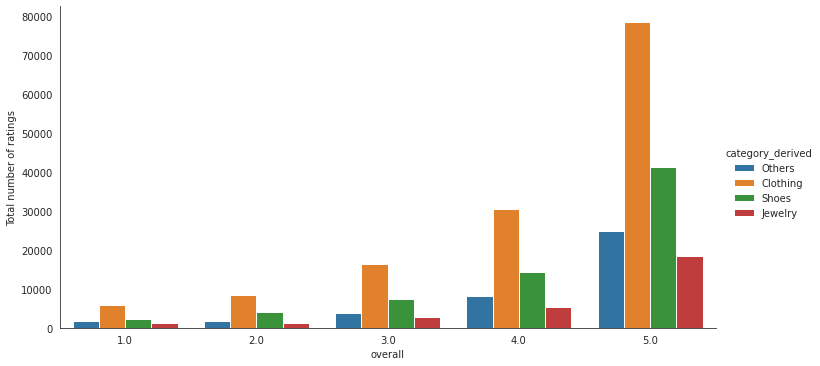

In [113]:
with sns.axes_style('white'):
    g = sns.factorplot(x = "overall", hue = "category_derived" ,data=df_merged_c, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [483]:
df_merged_c[df_merged_c['total_helpful']!=0].groupby(['category_derived','len_reviewText_claned_bins']).agg({'positive_helpful_ratio':'mean'})

positive_helpful_ratio
category_derived len_reviewText_claned_bins                        
Clothing         L                                         0.401641
                 M                                         0.436231
                 H                                         0.494686
Jewelry          L                                         0.426701
                 M                                         0.441393
                 H                                         0.475164
Others           L                                         0.391406
                 M                                         0.420695
                 H                                         0.496828
Shoes            L                                         0.388633
                 M                                         0.418634
                 H                                         0.466047

#### Similar pattern is observed for positive helpful ratio across categories compared to overall cleaned reviews bins

In [484]:
df_merged_c[df_merged_c['total_helpful']!=0].groupby(['category_derived','len_summary_cleaned_bins']).agg({'positive_helpful_ratio':'mean'})

positive_helpful_ratio
category_derived len_summary_cleaned_bins                        
Clothing         L                                       0.432933
                 M                                       0.455957
                 H                                       0.472101
Jewelry          L                                       0.439195
                 M                                       0.454235
                 H                                       0.453656
Others           L                                       0.426518
                 M                                       0.452374
                 H                                       0.477589
Shoes            L                                       0.416469
                 M                                       0.436999
                 H                                       0.455036

## Pricing

/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


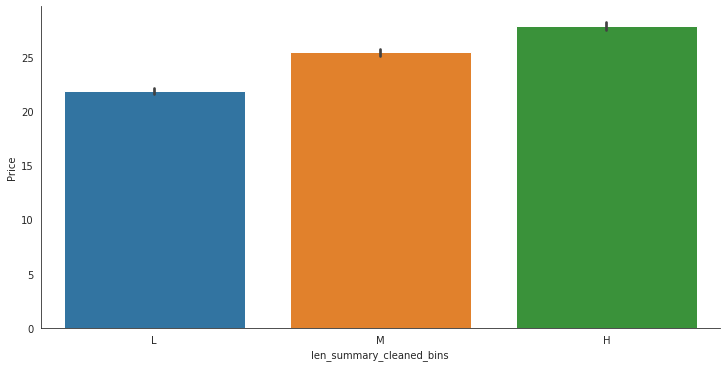

In [192]:
with sns.axes_style('white'):
    g = sns.factorplot(x = "len_summary_cleaned_bins", y = "price" ,data=df_merged_c, aspect=2.0,kind='bar')
    g.set_ylabels("Price")

/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


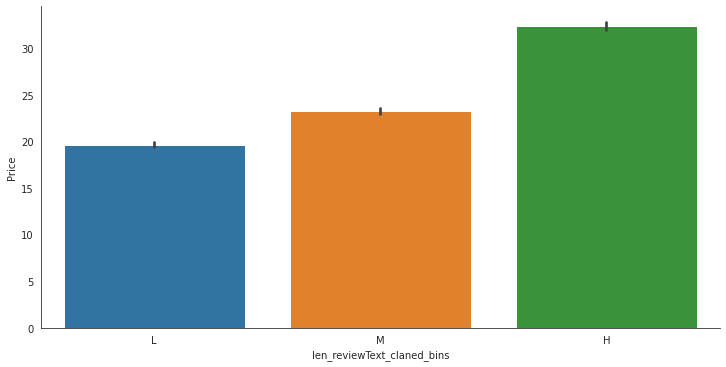

In [193]:
with sns.axes_style('white'):
    g = sns.factorplot(x = "len_reviewText_claned_bins", y = "price" ,data=df_merged_c, aspect=2.0,kind='bar')
    g.set_ylabels("Price")

In [207]:
df_merged_c[df_merged_c.price.notnull()].groupby(['category_derived','len_summary_cleaned_bins']).agg({'price':'mean'})


price
category_derived len_summary_cleaned_bins           
Clothing         L                         20.444742
                 M                         22.248228
                 H                         23.353140
Jewelry          L                         13.280462
                 M                         15.405192
                 H                         17.459431
Others           L                         27.823274
                 M                         33.304959
                 H                         35.581282
Shoes            L                         47.653835
                 M                         50.832328
                 H                         57.230962

In [208]:
df_merged_c[df_merged_c.price.notnull()].groupby(['category_derived','len_reviewText_claned_bins']).agg({'price':'mean'})


price
category_derived len_reviewText_claned_bins           
Clothing         L                           18.899995
                 M                           21.544905
                 H                           25.590147
Jewelry          L                           12.728785
                 M                           14.919959
                 H                           19.798472
Others           L                           24.558089
                 M                           27.891895
                 H                           42.172475
Shoes            L                           42.273417
                 M                           49.700051
                 H                           61.386725

In [210]:
df_merged_c[df_merged_c.price.isnull()].groupby('category_derived').agg({'len_summary_cleaned':'mean'})


len_summary_cleaned
category_derived                     
Clothing                    16.716972
Jewelry                     15.607183
Others                      17.935465
Shoes                       17.692066

In [212]:
df_merged_c[df_merged_c.price.isnull()].groupby('category_derived').agg({'len_reviewText_cleaned':'mean'})


len_reviewText_cleaned
category_derived                        
Clothing                      229.821011
Jewelry                       216.376101
Others                        301.452141
Shoes                         267.974505

In [213]:
df_merged_c[df_merged_c.price.notnull()].groupby('category_derived').agg({'len_summary_cleaned':'mean'})


len_summary_cleaned
category_derived                     
Clothing                    16.603232
Jewelry                     15.371647
Others                      17.498881
Shoes                       16.957463

In [243]:
df_merged_c['price_bins'] = pd.qcut(df_merged_c['price'], 3, labels = list('LMH'))

In [257]:
df_merged_c['price_bins'].value_counts()

L    39491
H    37957
M    36464
Name: price_bins, dtype: int64

In [267]:
df_merged_c[df_merged_c.price.notnull()].groupby('price_bins').reviewerID.nunique()


price_bins
L    18893
M    21865
H    21704
Name: reviewerID, dtype: int64

In [804]:
df_merged_c[df_merged_c.price.notnull()].groupby(['category_derived','price_bins','pos_neg']).reviewText.nunique()


category_derived  price_bins  pos_neg
Clothing          L           0           3347
                              1          11677
                  M           0           4036
                              1          16335
                  H           0           2953
                              1          13869
Jewelry           L           0           2797
                              1          11034
                  M           0            967
                              1           5075
                  H           0            708
                              1           4167
Others            L           0           2262
                              1           7484
                  M           0           1600
                              1           7124
                  H           0           1786
                              1          10110
Shoes             L           0            211
                              1            672
                  M   

In [803]:
df_merged_c[df_merged_c.price.notnull()].groupby(['category_derived','price_bins','pos_neg']).asin.nunique()

category_derived  price_bins  pos_neg
Clothing          L           0          1023
                              1          1273
                  M           0          1404
                              1          1755
                  H           0          1185
                              1          1537
Jewelry           L           0           727
                              1           951
                  M           0           440
                              1           630
                  H           0           376
                              1           559
Others            L           0           616
                              1           760
                  M           0           591
                              1           794
                  H           0           753
                              1          1134
Shoes             L           0            70
                              1            78
                  M           0           

In [277]:
#Price Variation by time

In [290]:
df_merged_c.head(5)

Unnamed: 0      reviewerID        asin                 reviewerName helpful                                         reviewText  overall                        summary  unixReviewTime   reviewTime  metadataid                        salesrank                                              imurl                                         categories                       title                                        description  price                                            related           brand  positive_helpful  negative_helpful  total_helpful  positive_helpful_ratio  len_reviewText category_derived  len_summary check len_summary_bins len_reviewText_bins                                 reviewText_cleaned          summary_cleaned  len_reviewText_cleaned  len_summary_cleaned len_summary_cleaned_bins len_reviewText_claned_bins price_bins salesrank_derived
0           0  A1KLRMWW2FWPL4  0000031887  Amazon Customer "cameramom"  [0, 0]  This is a great tutu and at a really great pri...      5.0  Great tutu-  not cheaply made      1297468800  02 12, 2011          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           172.0           Others         29.0     H                H                   M  ThisisagreattutuandatareallygreatpriceItdoesnt...  Greattutunotcheaplymade                     130                   23                        H                          M          L              8547
1           1  A2G5TCU2WDFZ65  0000031887              Amazon Customer  [0, 0]  I bought this for my 4 yr old daughter for dan...      5.0                    Very Cute!!      1358553600  01 19, 2013          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           306.0           Others         11.0     L                L                   H  Iboughtthisformy4yrolddaughterfordanceclassshe...                 VeryCute                     240                    8                        L                          H          L              8547
2           2  A1RLQXYNCMWRWN  0000031887                       Carola  [0, 0]  What can I say... my daughters have it in oran...      5.0       I have buy more than one      1357257600   01 4, 2013          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           312.0           Others         24.0     H                H                   H  WhatcanIsaymydaughtershaveitinorangeblackwhite...      Ihavebuymorethanone                     238                   19                        H                          H          L              8547
3           3   A8U3FAMSJVHS5  0000031887                      Caromcg  [0, 0]  We bought several tutus at once, and they are ...      5.0               Adorable, Sturdy      1398556800  04 27, 2014          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0         

In [338]:
df_merged_c['salesrank_derived'] = df_merged_c['salesrank'].apply(lambda x: x.partition(':')[2])
df_merged_c['salesrank_derived'] = df_merged_c['salesrank_derived'].apply(lambda x: x.replace('"', ''))
df_merged_c['salesrank_derived'] = df_merged_c['salesrank_derived'].apply(lambda x: x.replace('{', ''))
df_merged_c['salesrank_derived'] = df_merged_c['salesrank_derived'].apply(lambda x: x.replace("'", ''))
df_merged_c['salesrank_derived'] = df_merged_c['salesrank_derived'].apply(lambda x: x.replace("}", ''))

In [339]:
df_merged_c['salesrank_derived'] = df_merged_c['salesrank_derived'].apply(lambda x: x.replace(' ', ''))

In [361]:
df_merged_c_1 = df_merged_c[df_merged_c['salesrank_derived']!='']

In [362]:
df_merged_c_1['salesrank_derived'] = df_merged_c_1['salesrank_derived'].astype(int)

/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [372]:
df_merged_c[df_merged_c.price.notnull()].groupby('asin').price.nunique()

In [374]:
df_merged_c.columns

Index(['Unnamed: 0', 'reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime', 'metadataid', 'salesrank', 'imurl', 'categories', 'title', 'description', 'price', 'related', 'brand', 'positive_helpful', 'negative_helpful', 'total_helpful', 'positive_helpful_ratio', 'len_reviewText', 'category_derived', 'len_summary', 'check', 'len_summary_bins', 'len_reviewText_bins', 'reviewText_cleaned', 'summary_cleaned', 'len_reviewText_cleaned', 'len_summary_cleaned', 'len_summary_cleaned_bins', 'len_reviewText_claned_bins', 'price_bins', 'salesrank_derived'], dtype='object')

#### Price & Salesrank do not vary over time

## Reviewer Behaviour

In [401]:

df_merged_c['date'] = pd.to_datetime(df['unixReviewTime'],unit='s')

In [402]:
from datetime import date
from datetime import datetime, timedelta

In [403]:
df_merged_c['date'] = df_merged_c['date'].apply(lambda x: x.date().strftime("%Y-%m-%d"))

In [413]:
df_merged_c.head(5)

Unnamed: 0      reviewerID        asin                 reviewerName helpful                                         reviewText  overall                        summary  unixReviewTime   reviewTime  metadataid                        salesrank                                              imurl                                         categories                       title                                        description  price                                            related           brand  positive_helpful  negative_helpful  total_helpful  positive_helpful_ratio  len_reviewText category_derived  len_summary check len_summary_bins len_reviewText_bins                                 reviewText_cleaned          summary_cleaned  len_reviewText_cleaned  len_summary_cleaned len_summary_cleaned_bins len_reviewText_claned_bins price_bins salesrank_derived        date month
0           0  A1KLRMWW2FWPL4  0000031887  Amazon Customer "cameramom"  [0, 0]  This is a great tutu and at a really great pri...      5.0  Great tutu-  not cheaply made      1297468800  02 12, 2011          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           172.0           Others         29.0     H                H                   M  ThisisagreattutuandatareallygreatpriceItdoesnt...  Greattutunotcheaplymade                     130                   23                        H                          M          L              8547  2011-02-12     2
1           1  A2G5TCU2WDFZ65  0000031887              Amazon Customer  [0, 0]  I bought this for my 4 yr old daughter for dan...      5.0                    Very Cute!!      1358553600  01 19, 2013          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           306.0           Others         11.0     L                L                   H  Iboughtthisformy4yrolddaughterfordanceclassshe...                 VeryCute                     240                    8                        L                          H          L              8547  2013-01-19     1
2           2  A1RLQXYNCMWRWN  0000031887                       Carola  [0, 0]  What can I say... my daughters have it in oran...      5.0       I have buy more than one      1357257600   01 4, 2013          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           312.0           Others         24.0     H                H                   H  WhatcanIsaymydaughtershaveitinorangeblackwhite...      Ihavebuymorethanone                     238                   19                        H                          H          L              8547  2013-01-04     1
3           3   A8U3FAMSJVHS5  0000031887                      Caromcg  [0, 0]  We bought several tutus at once, and they are ...      5.0               Adorable, Sturdy      1398556800  04 27, 2014          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '000003

In [418]:
df_merged_c['month'] = df_merged_c['date'].apply(lambda x: x[5:7])

In [579]:
df_merged_c['year'] = df_merged_c['date'].apply(lambda x: x[0:4])

In [637]:
df_merged_c['year'] = df_merged_c['year'].astype(int)

In [638]:
df_merged_c[(df_merged_c['year']>= 2006)& (df_merged_c['year']<= 2013)].groupby(['category_derived','month']).agg({'reviewText':'count'})

reviewText
category_derived month            
Clothing         01           6016
                 02           5199
                 03           5105
                 04           5219
                 05           5394
                 06           5534
                 07           5934
                 08           6390
                 09           6489
                 10           8525
                 11          10593
                 12          15168
Jewelry          01           1507
                 02           1397
                 03           1337
                 04           1177
                 05           1254
                 06           1021
                 07           1271
                 08           1415
                 09           1409
                 10           1789
                 11           2076
                 12           3749
Others           01           2302
                 02           1728
                 03           1720
                 04           1845
                 05           1822
                 06           1738
                 07           1989
                 08           2186
                 09           1996
                 10           2561
                 11           2989
                 12           4769
Shoes            01           2913
                 02           2459
                 03           2776
                 04           3311
                 05           3371
                 06           3290
                 07           3447
                 08           3491
                 09           3447
                 10           4496
                 11           5222
                 12           6718

In [633]:
df_merged_c['asin_reviewer'] = df_merged_c['asin'] + df_merged_c['reviewerID']

In [498]:
df_merged_c['asin_reviewer'].nunique()

278677

#### Reviewer did not write more than one reviews for a product

In [436]:
df_merged_c.groupby('reviewerID').len_reviewText_claned_bins.nunique()

reviewerID
A001114613O3F18Q5NVR6    2
A00146182PNM90WNNAZ5Q    2
A00165422B2GAUE3EL6Z0    2
A00338282E99B8OR2JYTZ    3
A00354001GE099Q1FL0TU    2
                        ..
AZZMQ85DPFEG3            3
AZZNK89PXD006            1
AZZT1ERHBSNQ8            1
AZZTOUKVTUMVM            2
AZZYW4YOE1B6E            3
Name: len_reviewText_claned_bins, Length: 39387, dtype: int64

In [493]:
df_merged_c_2 = df_merged_c[['reviewerID','len_reviewText_claned_bins']]

In [494]:
df_merged_c_3 = df_merged_c_2.groupby(['reviewerID','len_reviewText_claned_bins']).size().unstack()

In [490]:
df_merged_c_4 = df_merged_c[df_merged_c['total_helpful']!=0][['reviewerID','len_reviewText_claned_bins']]

In [491]:
df_merged_c_5 = df_merged_c_4.groupby(['reviewerID','len_reviewText_claned_bins']).size().unstack()

In [448]:
df_merged_c.groupby('reviewerID').reviewText.nunique().sort_values(ascending=False)

reviewerID
A2J4XMWKR8PPD0    136
A2GA55P7WGHJCP     76
A2KBV88FL48CFS     69
AENH50GW3OKDA      68
A2V5R832QCSOMX     62
                 ... 
A2FWY7OWLFDRT3      5
A2FWYHP0T4FGKD      5
A3T6H846YFFH4G      4
A13LURP1U7PZZO      4
A1NF3H3XLK9OOO      4
Name: reviewText, Length: 39387, dtype: int64

In [496]:
df_merged_c[df_merged_c['total_helpful']!=0].groupby('reviewerID').agg({'positive_helpful_ratio':'mean'})


positive_helpful_ratio
reviewerID                                   
A001114613O3F18Q5NVR6                0.458333
A00146182PNM90WNNAZ5Q                0.413194
A00165422B2GAUE3EL6Z0                0.000000
A00404823GU1Q517KP4Z8                0.500000
A0055084JB2YQW2IDOSQ                 0.000000
...                                       ...
AZZHZZMH3U1VB                        0.333333
AZZKXNSXR6KBE                        0.500000
AZZMQ85DPFEG3                        0.391667
AZZNK89PXD006                        0.500000
AZZTOUKVTUMVM                        0.416667

[32959 rows x 1 columns]

#### High frequent reviewers wrote 70% of reviews either Long or Medium size (Avg Helpfulness score - 0.466 excluding 0 helpfulness)



#### Less frequent reviewers wrote 55% of reviews either Low size(Avg Helpfulness score - 0.429 excluding 0 helpfulness)


#### The above statements implies high frequent reviewers are more helpful by 10% compared to low frequent users

## Misc

In [503]:
df_merged_c.groupby('overall').agg({'len_reviewText_cleaned':'mean'})

len_reviewText_cleaned
overall                        
1.0                  261.271801
2.0                  266.970963
3.0                  260.274675
4.0                  264.165858
5.0                  232.042594

####  Higher ratings have less review length 

In [515]:
df_merged_c.groupby('asin').agg({'reviewText_cleaned':'count'}).sort_values(by='reviewText_cleaned', ascending=False)

reviewText_cleaned
asin                          
B005LERHD8                 441
B005GYGD7O                 286
B008WYDP1C                 249
B0058XIMMM                 241
B00CKGB85I                 225
...                        ...
B000VC3NUG                   5
B005T4FKRA                   5
B0028K3D86                   5
B00ADZ1H8G                   5
B0050XEPWQ                   5

[23033 rows x 1 columns]

In [516]:
df_merged_c.groupby('asin').agg({'reviewText_cleaned':'count'}).sort_values(by='reviewText_cleaned', ascending=False).head(20)

reviewText_cleaned
asin                          
B005LERHD8                 441
B005GYGD7O                 286
B008WYDP1C                 249
B0058XIMMM                 241
B00CKGB85I                 225
B007RD9DS8                 217
B002RADHJC                 211
B000T9VK56                 207
B0000C321X                 205
B0001ZNZJM                 197
B007WNWEFC                 197
B007WA3K4Y                 191
B00012O12A                 189
B007NLX16O                 189
B0008EOEPK                 186
B0007YR8WW                 185
B0067GUM2W                 183
B000O32MLI                 181
B001IB70JY                 180
B004Q7AB4I                 175

In [522]:
df_asin_top = df_merged_c.loc[df_merged_c['asin'].isin(['B005LERHD8','B0aa05GYGD7O','B008WYDP1C','B0058XIMMM','B00CKGB85I','B007RD9DS8','B002RADHJC','B000T9VK56','B0000C321X','B0001ZNZJM','B007WNWEFC','B007WA3K4Y','B00012O12A','B007NLX16O','B0008EOEPK','B0007YR8WW','B0067GUM2W','B000O32MLI','B001IB70JY','B004Q7AB4I'])]


In [554]:
df_merged_c['pos_neg'] = [1 if x > 3 else 0 for x in df_merged_c.overall]

In [531]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer


In [538]:
# !install_package_python3.sh wordcloud

In [534]:
import nltk
nltk.download('stopwords')
stops = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yelaganamonikarthik/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [535]:
def tokenize(text):
    tokenized = word_tokenize(text)
    no_punc = []
    for review in tokenized:
        line = "".join(char for char in review if char not in string.punctuation)
        no_punc.append(line)
    tokens = lemmatize(no_punc)
    return tokens


def lemmatize(tokens):
    lmtzr = WordNetLemmatizer()
    lemma = [lmtzr.lemmatize(t) for t in tokens]
    return lemma

In [539]:
import wordcloud

In [570]:
df_merged_c[df_merged_c['pos_neg']==1].review_nonum[1504]

'No BS long sleeve  Fits like it should Soft and great color    and I love the way it hangs'

In [569]:
df_merged_c['review_nonum'] = df_merged_c['reviewText'].str.replace('\d+', '')
df_merged_c['review_nonum'] = df_merged_c['review_nonum'].str.replace(r'[^\w\s]+', '')
df_merged_c['review_nonum'] = df_merged_c['review_nonum'].fillna('')

In [571]:
cloud_p = wordcloud.WordCloud(background_color='white', max_font_size=60, 
                                relative_scaling=1).generate(' '.join(df_merged_c[df_merged_c['pos_neg']==1].review_nonum))

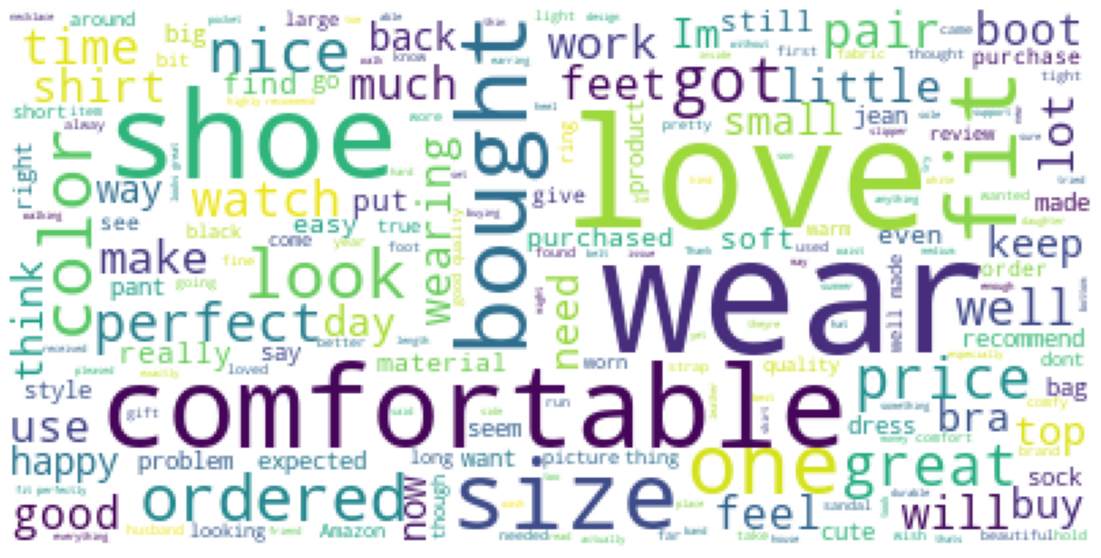

In [572]:
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud_p);

In [573]:
cloud_n = wordcloud.WordCloud(background_color='white', max_font_size=60, 
                                relative_scaling=1).generate(' '.join(df_merged_c[df_merged_c['pos_neg']==0].review_nonum))

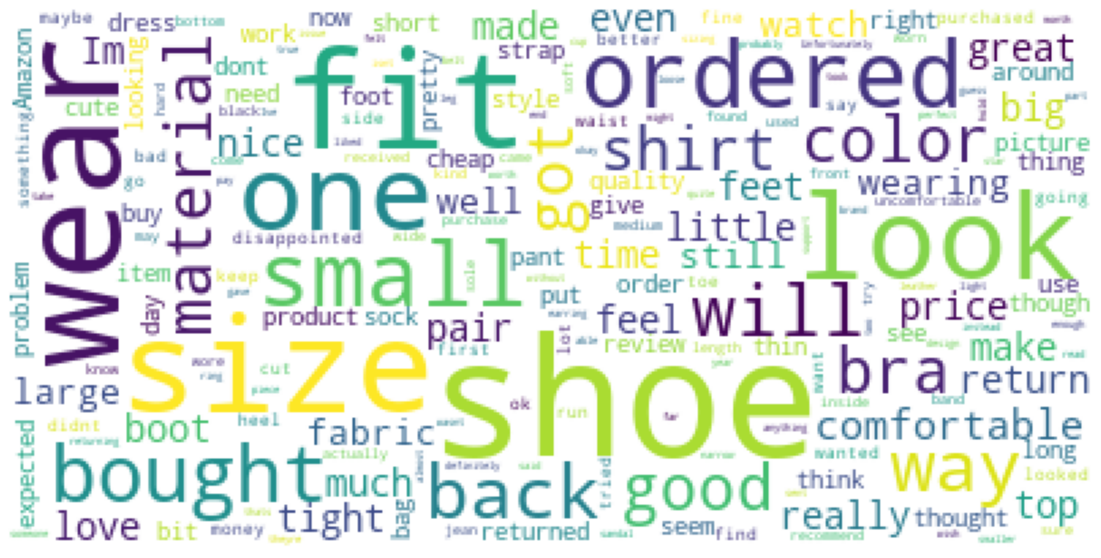

In [574]:
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud_n);

In [575]:
df_merged_c['pos_neg'].value_counts()

1    221597
0     57080
Name: pos_neg, dtype: int64

In [576]:
df_merged_c.head(5)

Unnamed: 0      reviewerID        asin                 reviewerName helpful                                         reviewText  overall                        summary  unixReviewTime   reviewTime  metadataid                        salesrank                                              imurl                                         categories                       title                                        description  price                                            related           brand  positive_helpful  negative_helpful  total_helpful  positive_helpful_ratio  len_reviewText category_derived  len_summary check len_summary_bins len_reviewText_bins                                 reviewText_cleaned          summary_cleaned  len_reviewText_cleaned  len_summary_cleaned len_summary_cleaned_bins len_reviewText_claned_bins price_bins salesrank_derived        date month             asin_reviewer  pos_neg                                       review_nonum
0           0  A1KLRMWW2FWPL4  0000031887  Amazon Customer "cameramom"  [0, 0]  This is a great tutu and at a really great pri...      5.0  Great tutu-  not cheaply made      1297468800  02 12, 2011          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           172.0           Others         29.0     H                H                   M  ThisisagreattutuandatareallygreatpriceItdoesnt...  Greattutunotcheaplymade                     130                   23                        H                          M          L              8547  2011-02-12    02  0000031887A1KLRMWW2FWPL4        1  This is a great tutu and at a really great pri...
1           1  A2G5TCU2WDFZ65  0000031887              Amazon Customer  [0, 0]  I bought this for my 4 yr old daughter for dan...      5.0                    Very Cute!!      1358553600  01 19, 2013          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           306.0           Others         11.0     L                L                   H  Iboughtthisformy4yrolddaughterfordanceclassshe...                 VeryCute                     240                    8                        L                          H          L              8547  2013-01-19    01  0000031887A2G5TCU2WDFZ65        1  I bought this for my  yr old daughter for danc...
2           2  A1RLQXYNCMWRWN  0000031887                       Carola  [0, 0]  What can I say... my daughters have it in oran...      5.0       I have buy more than one      1357257600   01 4, 2013          44  {'Sports &amp; Outdoors': 8547}  http://ecx.images-amazon.com/images/I/314qZjYe...  [['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...  Ballet Dress-Up Fairy Tutu  This adorable basic ballerina tutu is perfect ...   6.79  {'also_bought': ['0000031852', '0000031895', '...  Boutique Cutie                 0                 0              0                     0.0           312.0           Others         24.0     H                H                   H  WhatcanIsaymydaughtershaveitinorangeblackwhite...      Ihavebuymorethanone                     238                   19                        H                          H          L              8547  2013-01-04    01  0000031887A1RLQXYNCMWRWN        1  What can I say my daughters have it in orange ...
3           3   A8U3FAMSJVHS5  0000031887                      Caromcg  [0, 0]  We bought several tutus at once, and they are .

In [592]:
df_merged_c.groupby(['year']).agg({'reviewText':'count'})

reviewText
year            
2003           2
2004           6
2005          27
2006         115
2007         451
2008         868
2009        1661
2010        3456
2011        9845
2012       32648
2013      128510
2014      101064

In [595]:
df_merged_c.groupby(['year']).reviewerID.nunique()

year
2003        2
2004        5
2005       19
2006       85
2007      323
2008      638
2009     1203
2010     2349
2011     5501
2012    13921
2013    31689
2014    27734
Name: reviewerID, dtype: int64

#### Reviewers are wring more reviews across years

#### Bigrams before removing stop words

In [670]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [604]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [762]:
df_merged_c['total_review'] = df_merged_c['reviewText'] + ' ' + df_merged_c['summary']

In [765]:
df_merged_c['total_review_comwords'] = df_merged_c['total_review'].fillna('')

In [ ]:
df_merged_c['total_review_nonum'] = df_merged_c['total_review_comwords'].str.replace('\d+', '')
df_merged_c['total_review_nonum'] = df_merged_c['total_review_nonum'].str.replace(r'[^\w\s]+', '')
df_merged_c['total_review_nonum'] = df_merged_c['total_review_nonum'].fillna('')

In [ ]:
df_merged_c['reviewText_comwords'] = df_merged_c['reviewText'].fillna('')

#### Across all the months

In [766]:
common_words_good = get_top_n_bigram(df_merged_c[df_merged_c['pos_neg']==1]['total_review_comwords'], 30)

In [767]:
common_words_bad = get_top_n_bigram(df_merged_c[df_merged_c['pos_neg']==0]['total_review_comwords'], 30)

/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


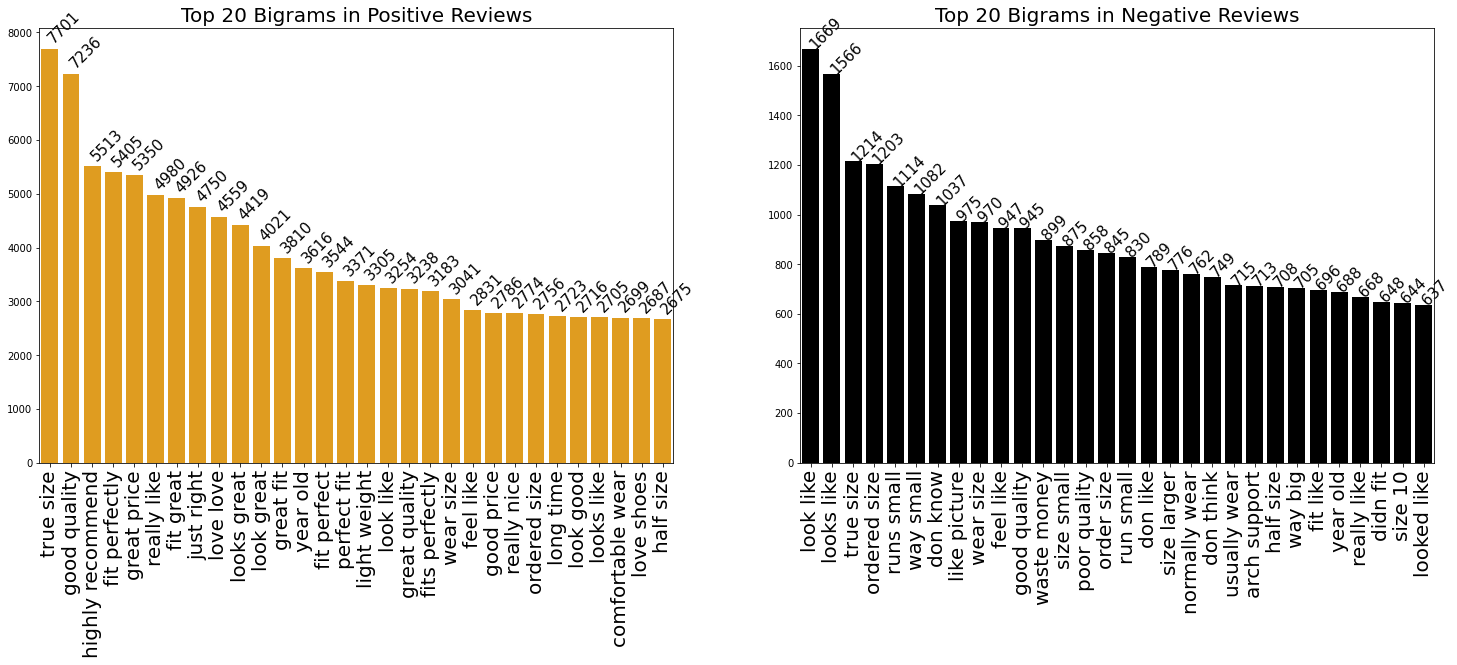

In [768]:
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good=[x[0] for x in common_words_good]
y_good=[x[1] for x in common_words_good]
sns.barplot(x_good,y_good,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good)):
    plt.text(i-0.2,y_good[i]+100,'{}'.format(y_good[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad=[x[0] for x in common_words_bad]
y_bad=[x[1] for x in common_words_bad]
sns.barplot(x_bad,y_bad,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad)):
    plt.text(i-0.2,y_bad[i],'{}'.format(y_bad[i]),size=15,rotation=45)

In [663]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [769]:
common_words_good1 = get_top_n_trigram(df_merged_c[df_merged_c['pos_neg']==1]['total_review_comwords'], 30)
common_words_bad1= get_top_n_trigram(df_merged_c[df_merged_c['pos_neg']==0]['total_review_comwords'], 30)

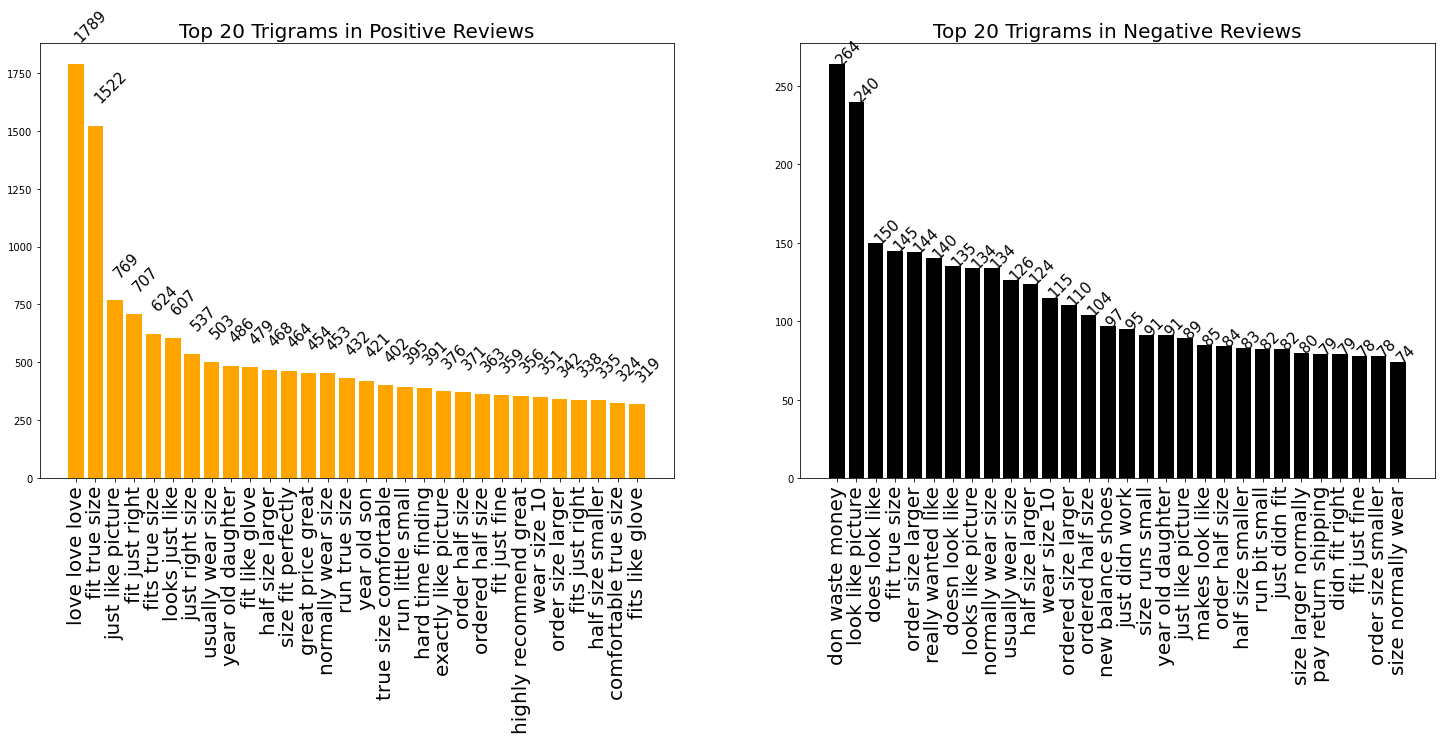

In [770]:
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good1=[x[0] for x in common_words_good1]
y_good1=[x[1] for x in common_words_good1]
plt.bar(x_good1,y_good1,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good1)):
    plt.text(i-0.2,y_good1[i]+100,'{}'.format(y_good1[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad1=[x[0] for x in common_words_bad1]
y_bad1=[x[1] for x in common_words_bad1]
plt.bar(x_bad1,y_bad1,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad1)):
    plt.text(i-0.2,y_bad1[i],'{}'.format(y_bad1[i]),size=15,rotation=45)

In [640]:
df_merged_c['month'] = df_merged_c['month'].astype(int)

In [772]:
set(df_merged_c['price_bins'])

{'H', 'L', 'M', nan}

/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


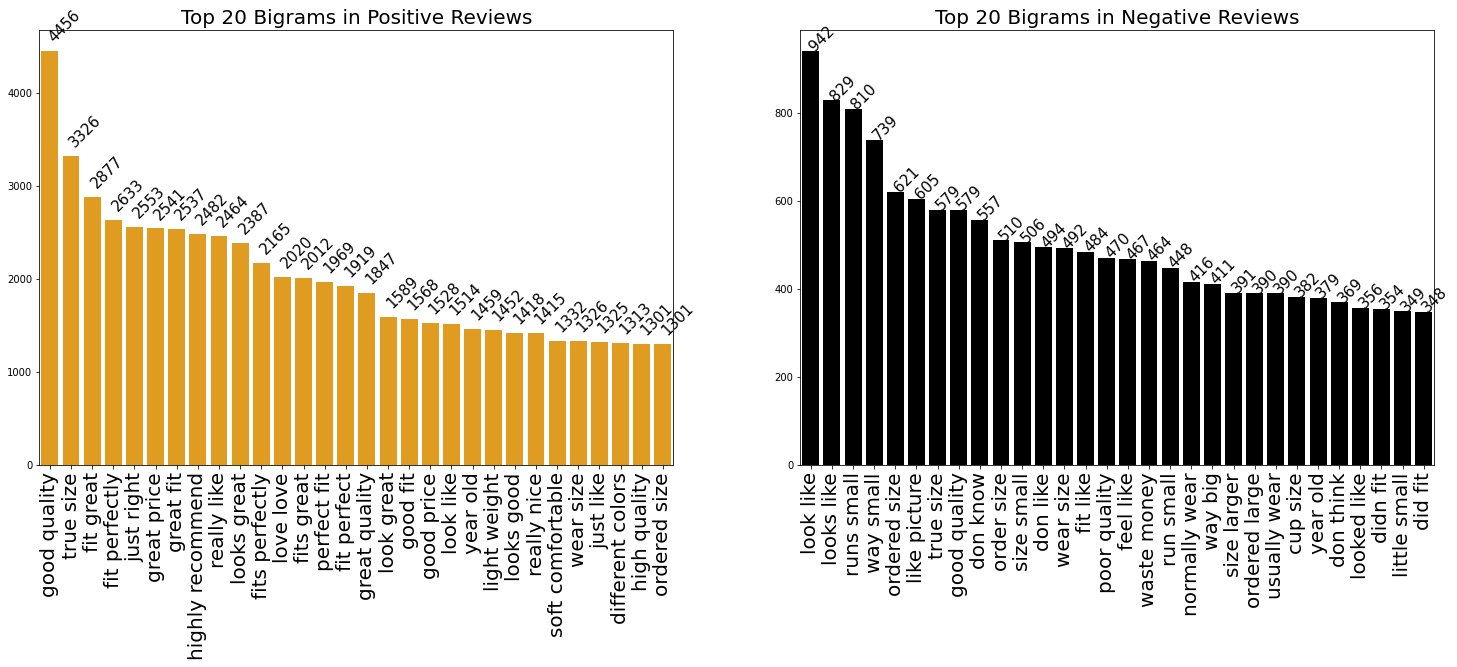

In [773]:
common_words_good_c = get_top_n_bigram(df_merged_c[(df_merged_c['pos_neg']==1) & (df_merged_c['category_derived']=='Clothing')]['total_review_comwords'], 30)
common_words_bad_c = get_top_n_bigram(df_merged_c[(df_merged_c['pos_neg']==0) & (df_merged_c['category_derived']=='Clothing')]['total_review_comwords'], 30)
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good=[x[0] for x in common_words_good_c]
y_good=[x[1] for x in common_words_good_c]
sns.barplot(x_good,y_good,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good)):
    plt.text(i-0.2,y_good[i]+100,'{}'.format(y_good[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad=[x[0] for x in common_words_bad_c]
y_bad=[x[1] for x in common_words_bad_c]
sns.barplot(x_bad,y_bad,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad)):
    plt.text(i-0.2,y_bad[i],'{}'.format(y_bad[i]),size=15,rotation=45)


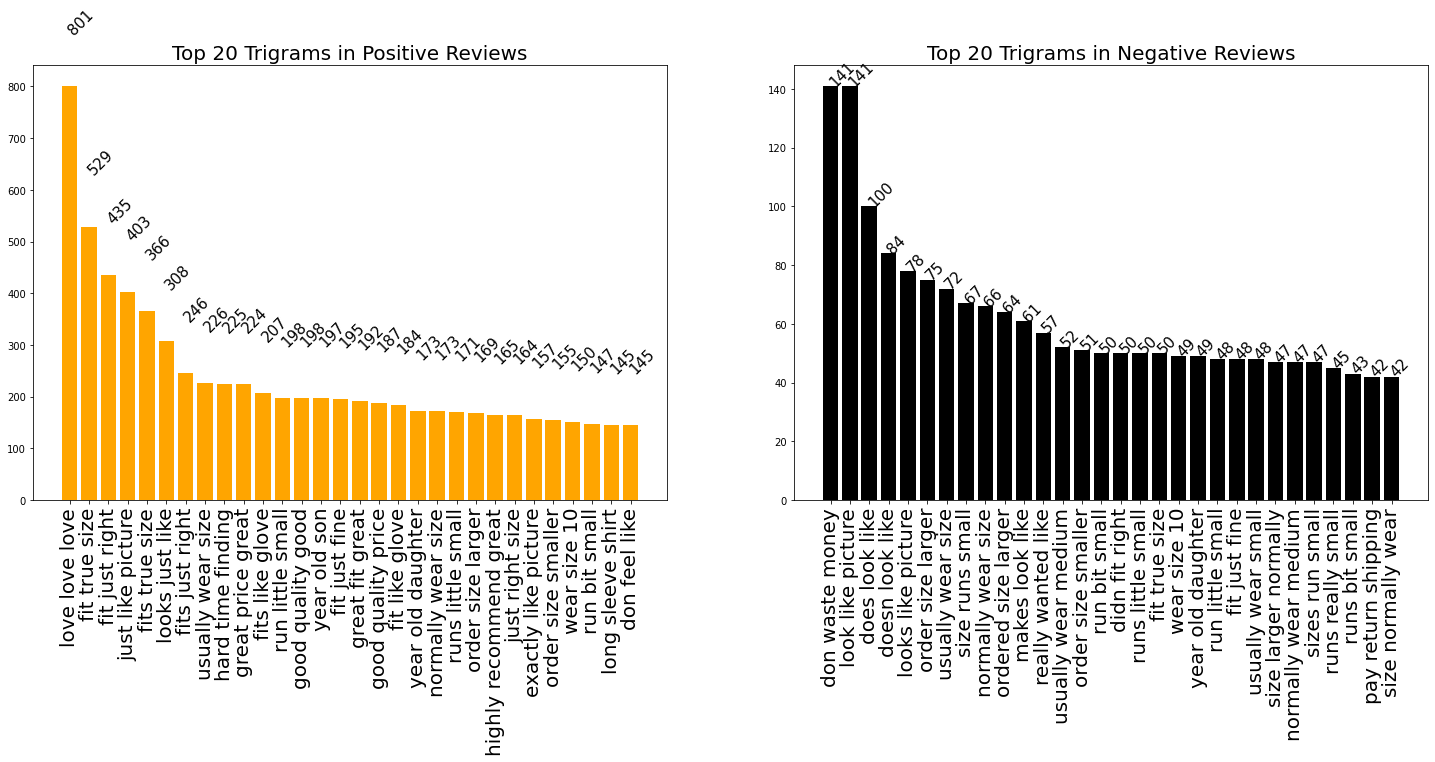

In [785]:
common_words_good_t_c = get_top_n_trigram(df_merged_c[(df_merged_c['pos_neg']==1) & (df_merged_c['category_derived']=='Clothing')]['total_review_comwords'], 30)
common_words_bad_t_c= get_top_n_trigram(df_merged_c[(df_merged_c['pos_neg']==0) & (df_merged_c['category_derived']=='Clothing')]['total_review_comwords'], 30)
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good1=[x[0] for x in common_words_good_t_c]
y_good1=[x[1] for x in common_words_good_t_c]
plt.bar(x_good1,y_good1,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good1)):
    plt.text(i-0.2,y_good1[i]+100,'{}'.format(y_good1[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad1=[x[0] for x in common_words_bad_t_c]
y_bad1=[x[1] for x in common_words_bad_t_c]
plt.bar(x_bad1,y_bad1,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad1)):
    plt.text(i-0.2,y_bad1[i],'{}'.format(y_bad1[i]),size=15,rotation=45)


/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


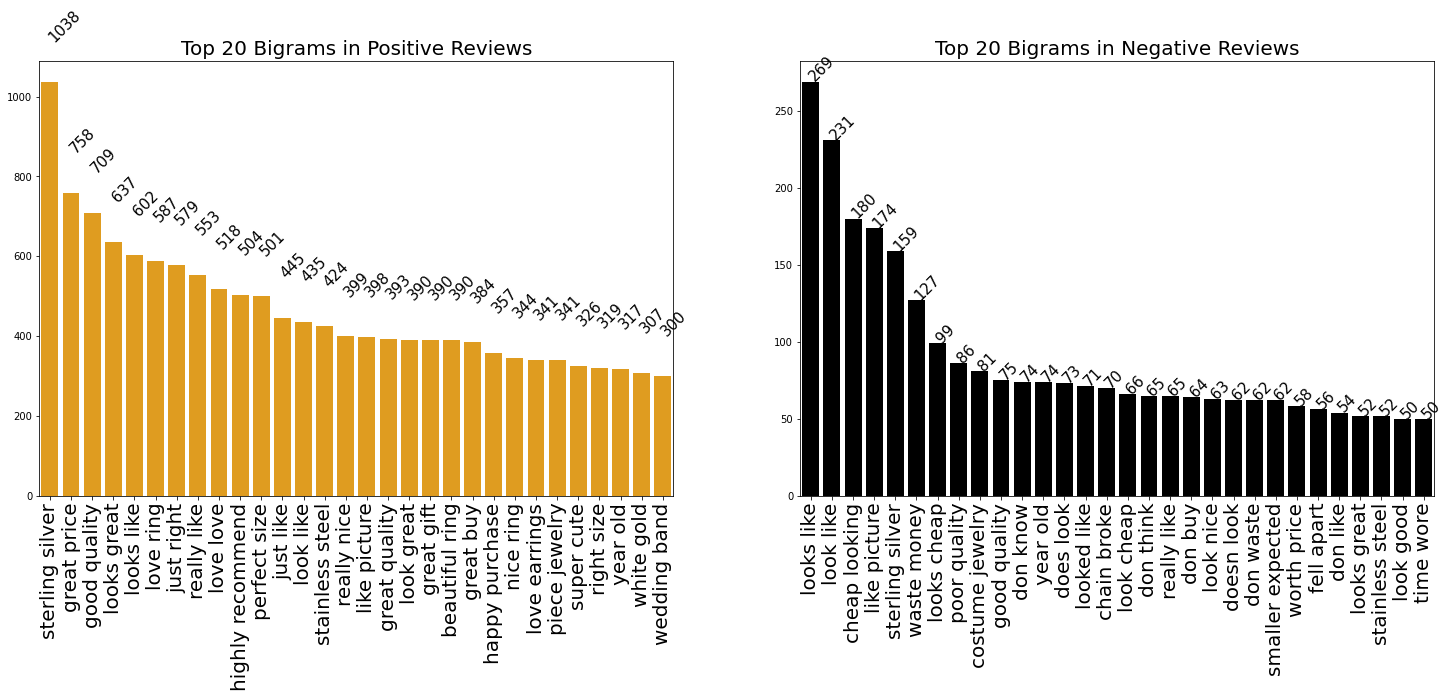

In [786]:
common_words_good_j = get_top_n_bigram(df_merged_c[(df_merged_c['pos_neg']==1) & (df_merged_c['category_derived']=='Jewelry')]['total_review_comwords'], 30)
common_words_bad_j = get_top_n_bigram(df_merged_c[(df_merged_c['pos_neg']==0) & (df_merged_c['category_derived']=='Jewelry')]['total_review_comwords'], 30)
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good=[x[0] for x in common_words_good_j]
y_good=[x[1] for x in common_words_good_j]
sns.barplot(x_good,y_good,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good)):
    plt.text(i-0.2,y_good[i]+100,'{}'.format(y_good[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad=[x[0] for x in common_words_bad_j]
y_bad=[x[1] for x in common_words_bad_j]
sns.barplot(x_bad,y_bad,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad)):
    plt.text(i-0.2,y_bad[i],'{}'.format(y_bad[i]),size=15,rotation=45)


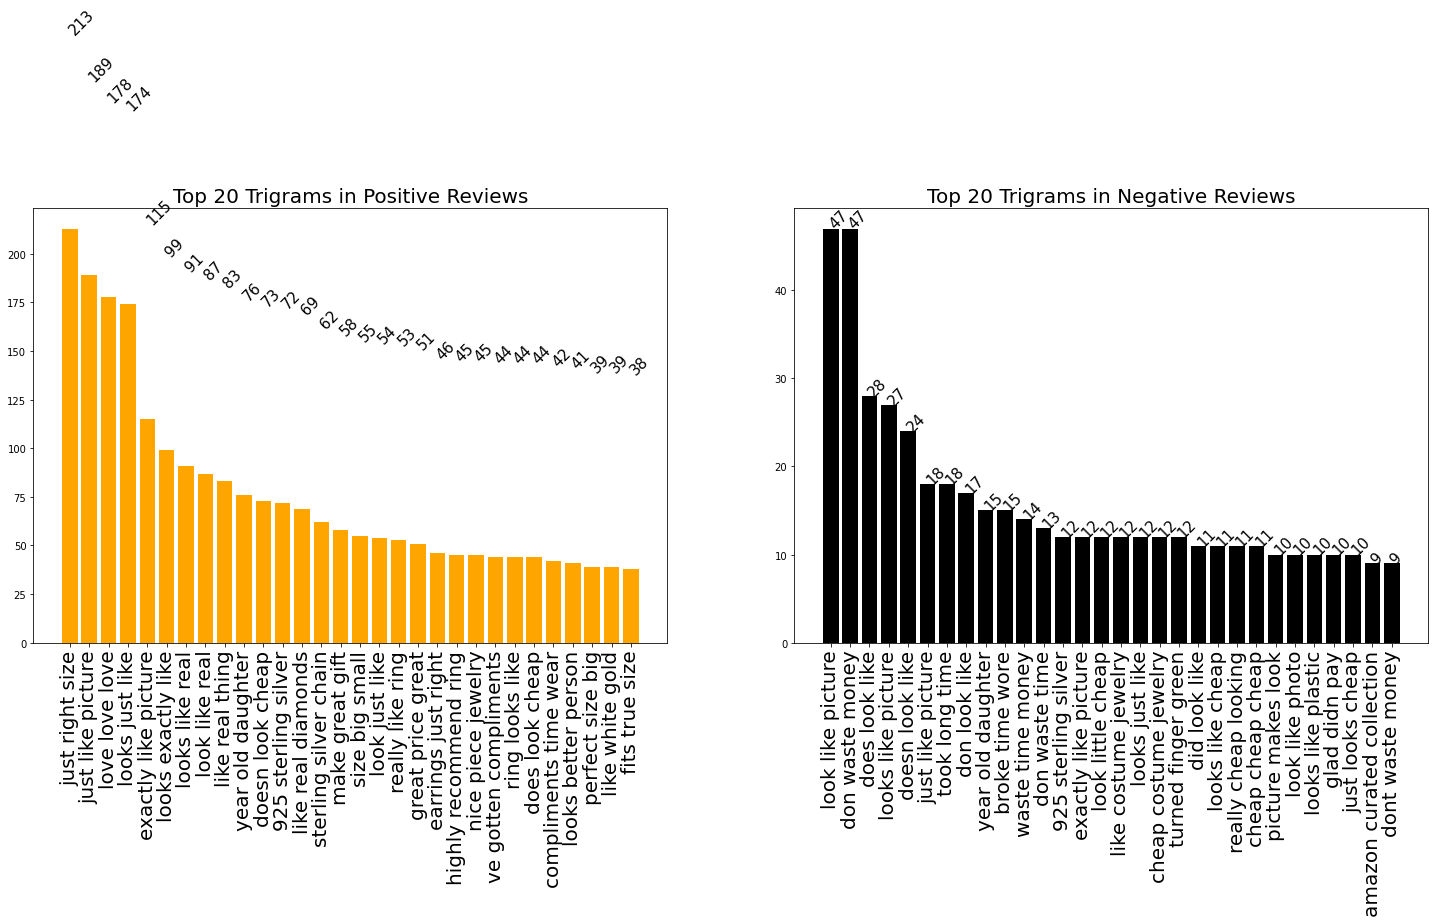

In [788]:
common_words_good_t_j = get_top_n_trigram(df_merged_c[(df_merged_c['pos_neg']==1) & (df_merged_c['category_derived']=='Jewelry')]['total_review_comwords'], 30)
common_words_bad_t_j= get_top_n_trigram(df_merged_c[(df_merged_c['pos_neg']==0) & (df_merged_c['category_derived']=='Jewelry')]['total_review_comwords'], 30)
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good1=[x[0] for x in common_words_good_t_j]
y_good1=[x[1] for x in common_words_good_t_j]
plt.bar(x_good1,y_good1,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good1)):
    plt.text(i-0.2,y_good1[i]+100,'{}'.format(y_good1[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad1=[x[0] for x in common_words_bad_t_j]
y_bad1=[x[1] for x in common_words_bad_t_j]
plt.bar(x_bad1,y_bad1,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad1)):
    plt.text(i-0.2,y_bad1[i],'{}'.format(y_bad1[i]),size=15,rotation=45)


/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


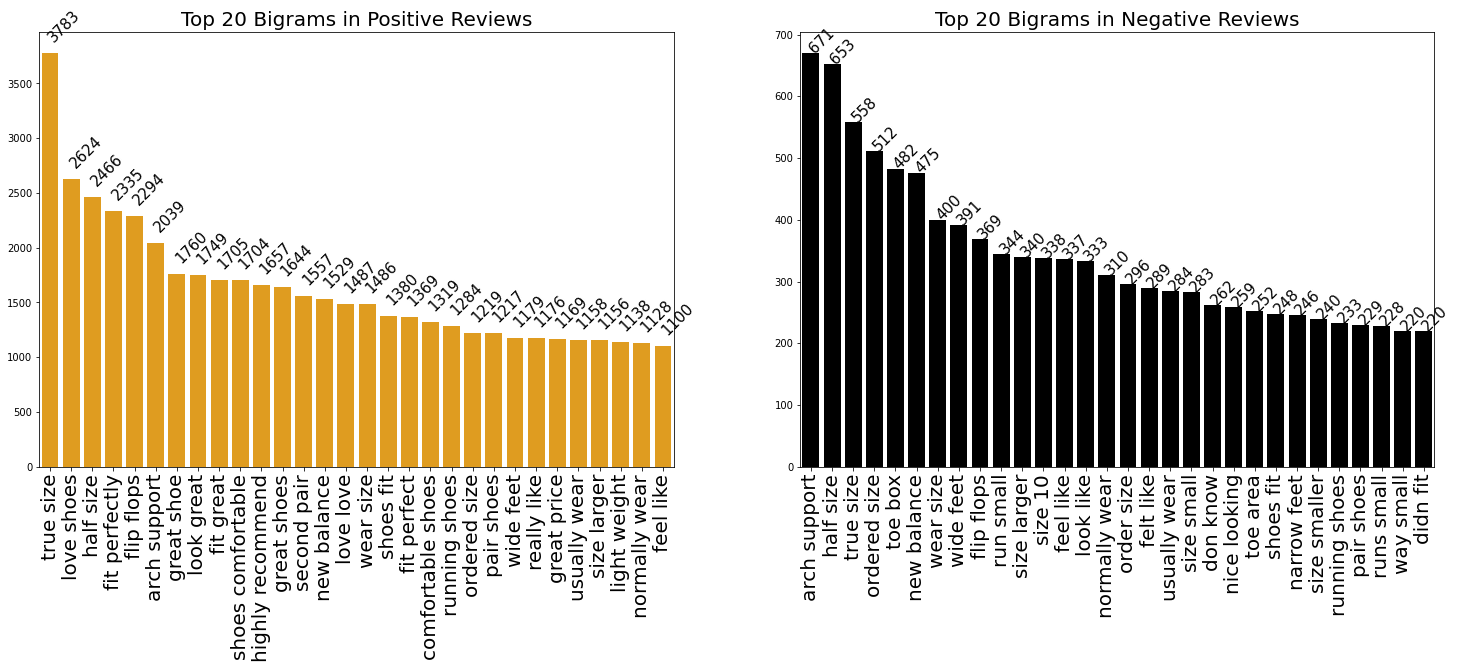

In [787]:
common_words_good_s = get_top_n_bigram(df_merged_c[(df_merged_c['pos_neg']==1) & (df_merged_c['category_derived']=='Shoes')]['total_review_comwords'], 30)
common_words_bad_s = get_top_n_bigram(df_merged_c[(df_merged_c['pos_neg']==0) & (df_merged_c['category_derived']=='Shoes')]['total_review_comwords'], 30)
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good=[x[0] for x in common_words_good_s]
y_good=[x[1] for x in common_words_good_s]
sns.barplot(x_good,y_good,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good)):
    plt.text(i-0.2,y_good[i]+100,'{}'.format(y_good[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad=[x[0] for x in common_words_bad_s]
y_bad=[x[1] for x in common_words_bad_s]
sns.barplot(x_bad,y_bad,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad)):
    plt.text(i-0.2,y_bad[i],'{}'.format(y_bad[i]),size=15,rotation=45)


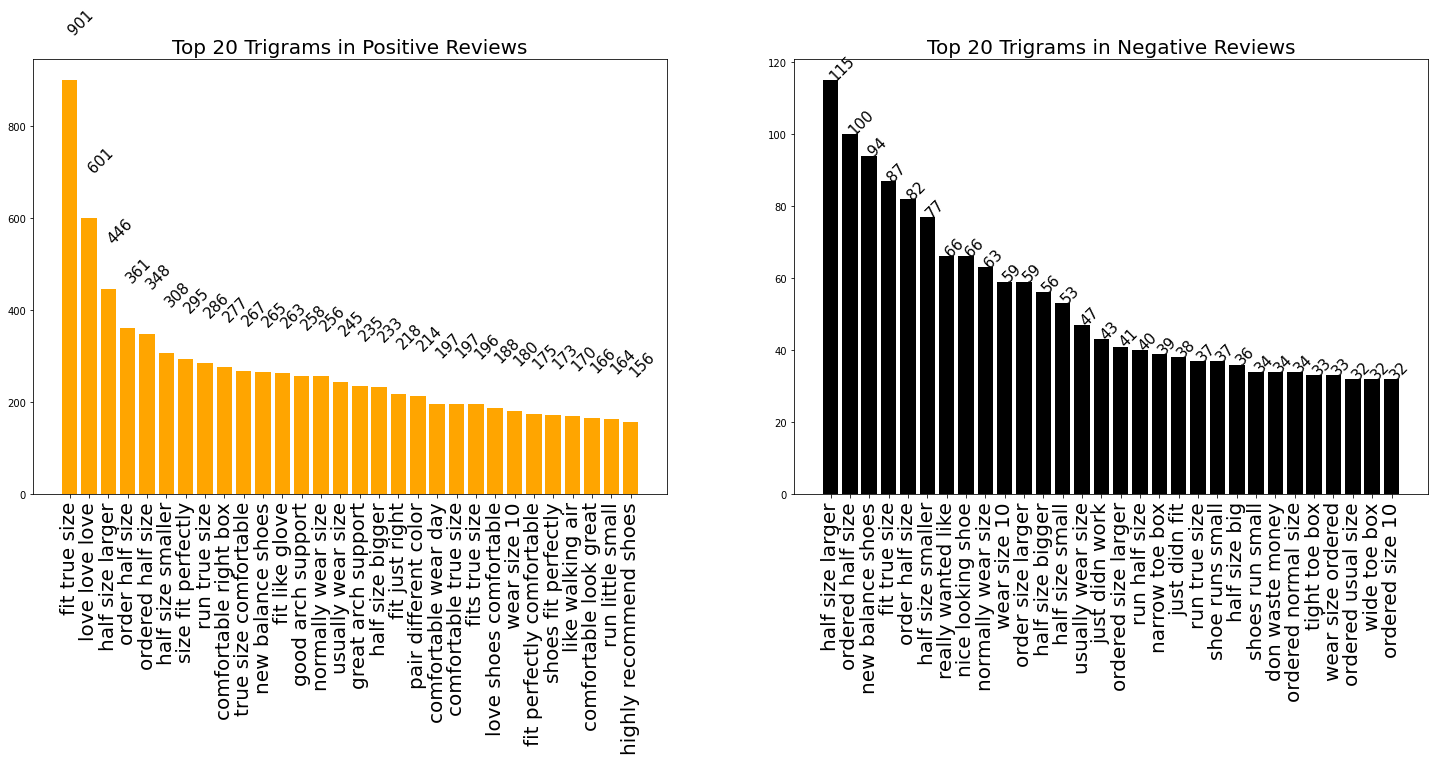

In [789]:
common_words_good_t_s = get_top_n_trigram(df_merged_c[(df_merged_c['pos_neg']==1) & (df_merged_c['category_derived']=='Shoes')]['total_review_comwords'], 30)
common_words_bad_t_s= get_top_n_trigram(df_merged_c[(df_merged_c['pos_neg']==0) & (df_merged_c['category_derived']=='Shoes')]['total_review_comwords'], 30)
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good1=[x[0] for x in common_words_good_t_s]
y_good1=[x[1] for x in common_words_good_t_s]
plt.bar(x_good1,y_good1,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good1)):
    plt.text(i-0.2,y_good1[i]+100,'{}'.format(y_good1[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad1=[x[0] for x in common_words_bad_t_s]
y_bad1=[x[1] for x in common_words_bad_t_s]
plt.bar(x_bad1,y_bad1,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad1)):
    plt.text(i-0.2,y_bad1[i],'{}'.format(y_bad1[i]),size=15,rotation=45)


/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


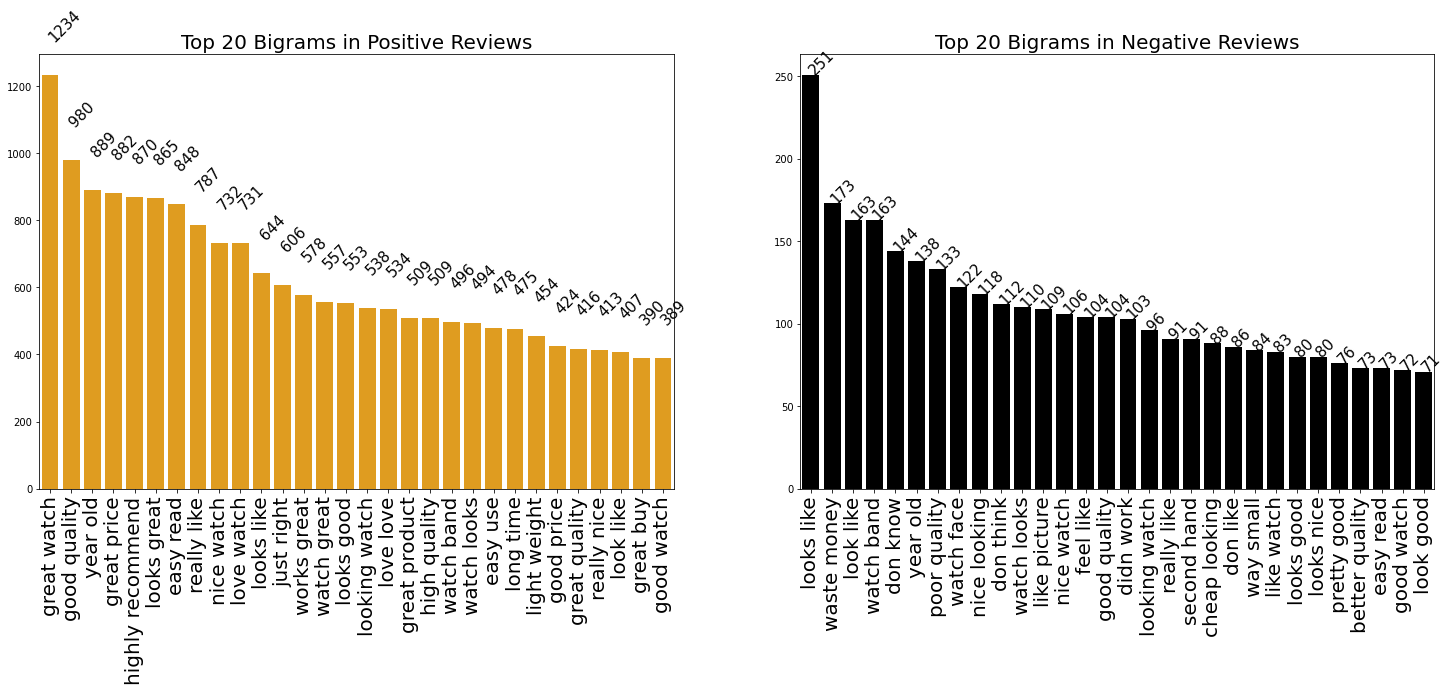

In [790]:
common_words_good_o = get_top_n_bigram(df_merged_c[(df_merged_c['pos_neg']==1) & (df_merged_c['category_derived']=='Others')]['total_review_comwords'], 30)
common_words_bad_o = get_top_n_bigram(df_merged_c[(df_merged_c['pos_neg']==0) & (df_merged_c['category_derived']=='Others')]['total_review_comwords'], 30)
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good=[x[0] for x in common_words_good_o]
y_good=[x[1] for x in common_words_good_o]
sns.barplot(x_good,y_good,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good)):
    plt.text(i-0.2,y_good[i]+100,'{}'.format(y_good[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad=[x[0] for x in common_words_bad_o]
y_bad=[x[1] for x in common_words_bad_o]
sns.barplot(x_bad,y_bad,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad)):
    plt.text(i-0.2,y_bad[i],'{}'.format(y_bad[i]),size=15,rotation=45)


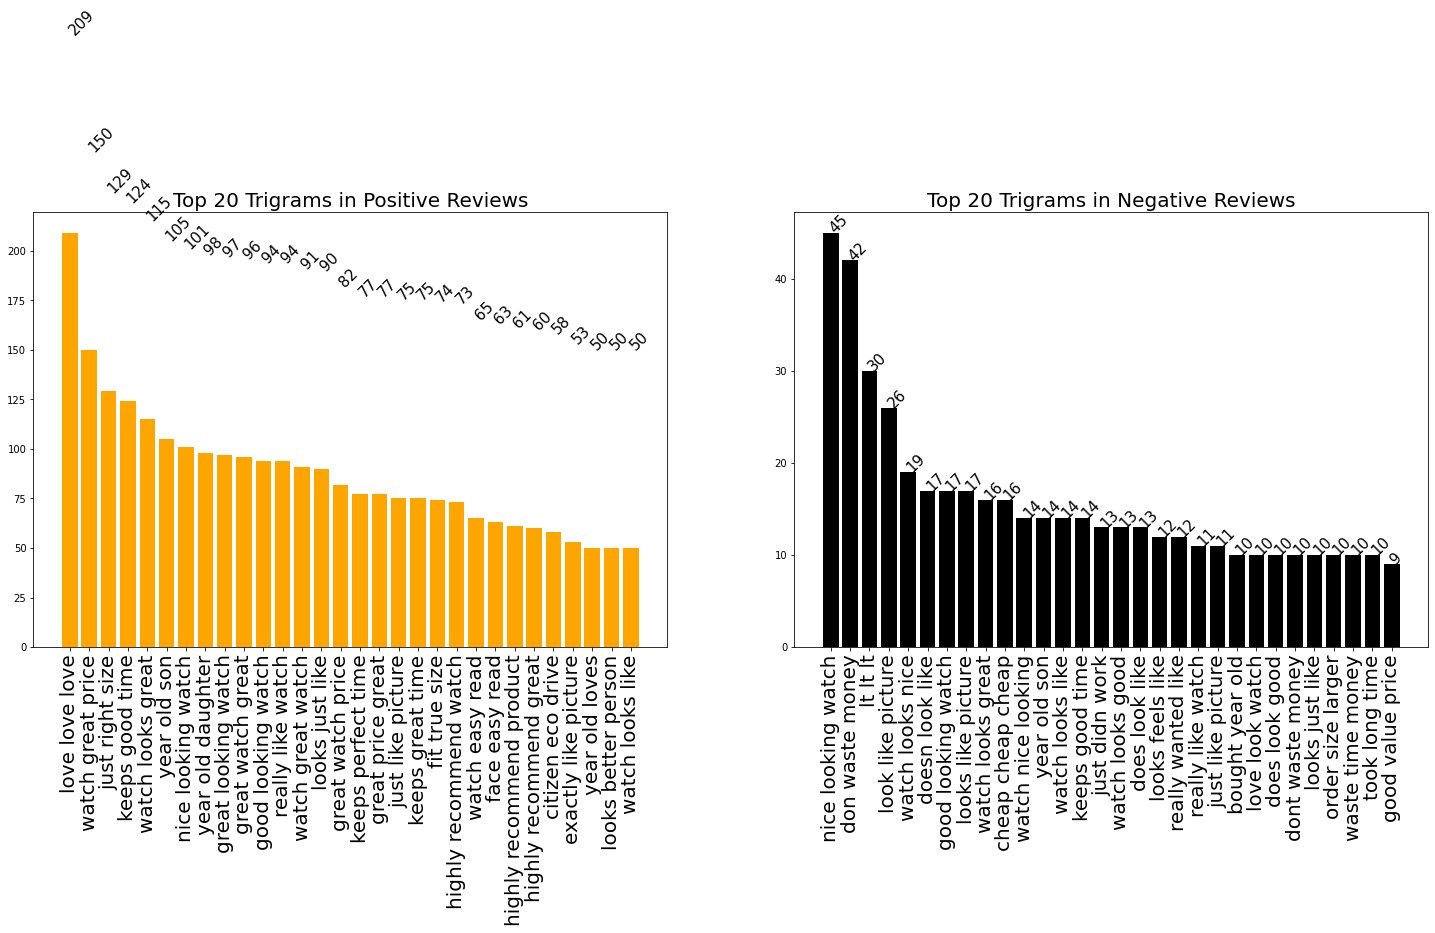

In [791]:
common_words_good_t_o = get_top_n_trigram(df_merged_c[(df_merged_c['pos_neg']==1) & (df_merged_c['category_derived']=='Others')]['total_review_comwords'], 30)
common_words_bad_t_o= get_top_n_trigram(df_merged_c[(df_merged_c['pos_neg']==0) & (df_merged_c['category_derived']=='Others')]['total_review_comwords'], 30)
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good1=[x[0] for x in common_words_good_t_o]
y_good1=[x[1] for x in common_words_good_t_o]
plt.bar(x_good1,y_good1,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good1)):
    plt.text(i-0.2,y_good1[i]+100,'{}'.format(y_good1[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad1=[x[0] for x in common_words_bad_t_o]
y_bad1=[x[1] for x in common_words_bad_t_o]
plt.bar(x_bad1,y_bad1,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad1)):
    plt.text(i-0.2,y_bad1[i],'{}'.format(y_bad1[i]),size=15,rotation=45)


#### Peak Times

In [654]:
common_words_good_em = get_top_n_bigram(df_merged_c[(df_merged_c['pos_neg']==1) & (df_merged_c['month']>=9) & (df_merged_c['month']<=12) & (df_merged_c['year']>= 2006)& (df_merged_c['year']<= 2013)]['reviewText_comwords'], 30)


In [655]:
common_words_bad_em = get_top_n_bigram(df_merged_c[(df_merged_c['pos_neg']==0) & (df_merged_c['month']>=9) & (df_merged_c['month']<=12)& (df_merged_c['year']>= 2006)& (df_merged_c['year']<= 2013)]['reviewText_comwords'], 30)


/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


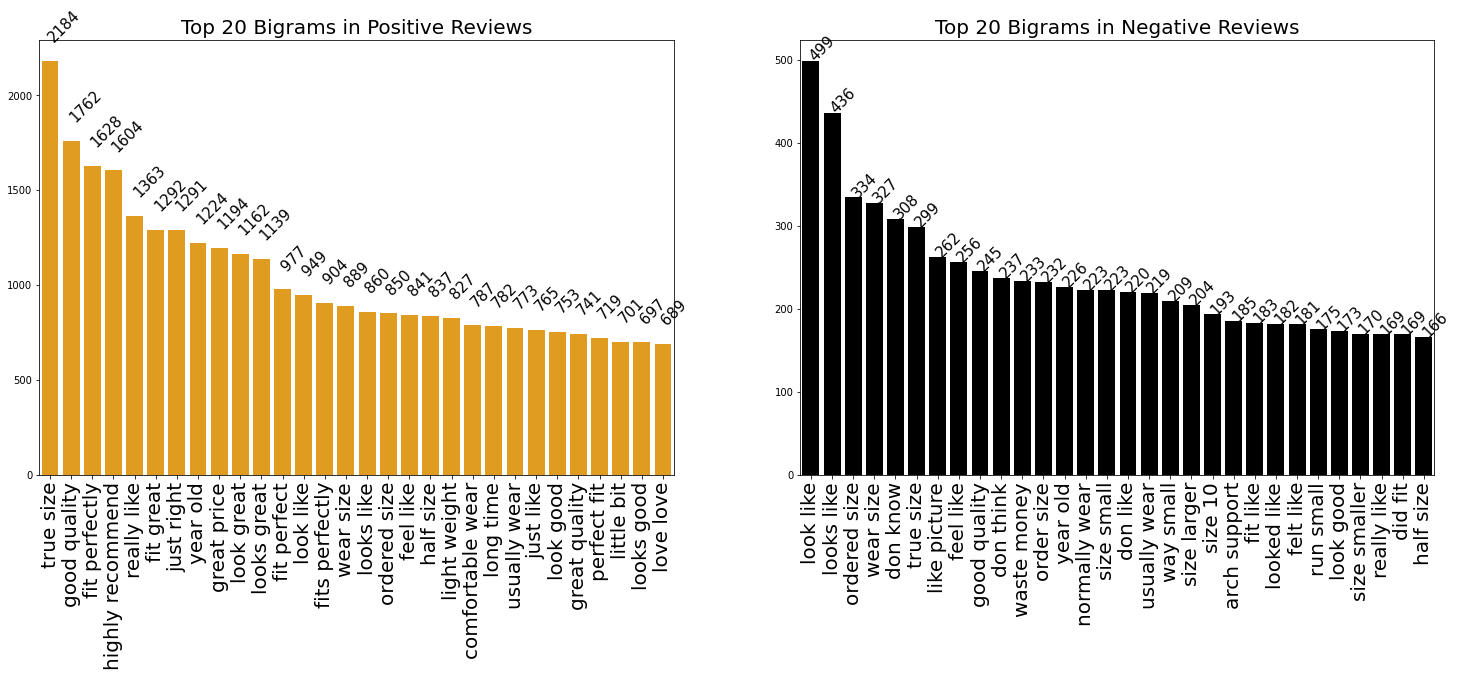

In [656]:
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good=[x[0] for x in common_words_good_em]
y_good=[x[1] for x in common_words_good_em]
sns.barplot(x_good,y_good,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good)):
    plt.text(i-0.2,y_good[i]+100,'{}'.format(y_good[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad=[x[0] for x in common_words_bad_em]
y_bad=[x[1] for x in common_words_bad_em]
sns.barplot(x_bad,y_bad,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad)):
    plt.text(i-0.2,y_bad[i],'{}'.format(y_bad[i]),size=15,rotation=45)

In [674]:
common_words_good1_em = get_top_n_trigram(df_merged_c[(df_merged_c['pos_neg']==1)  & (df_merged_c['month']>=9) & (df_merged_c['month']<=12) & (df_merged_c['year']>= 2006)& (df_merged_c['year']<= 2013)]['reviewText_comwords'], 30)
common_words_bad1_em= get_top_n_trigram(df_merged_c[(df_merged_c['pos_neg']==0)  & (df_merged_c['month']>=9) & (df_merged_c['month']<=12) & (df_merged_c['year']>= 2006)& (df_merged_c['year']<= 2013)]['reviewText_comwords'], 30)


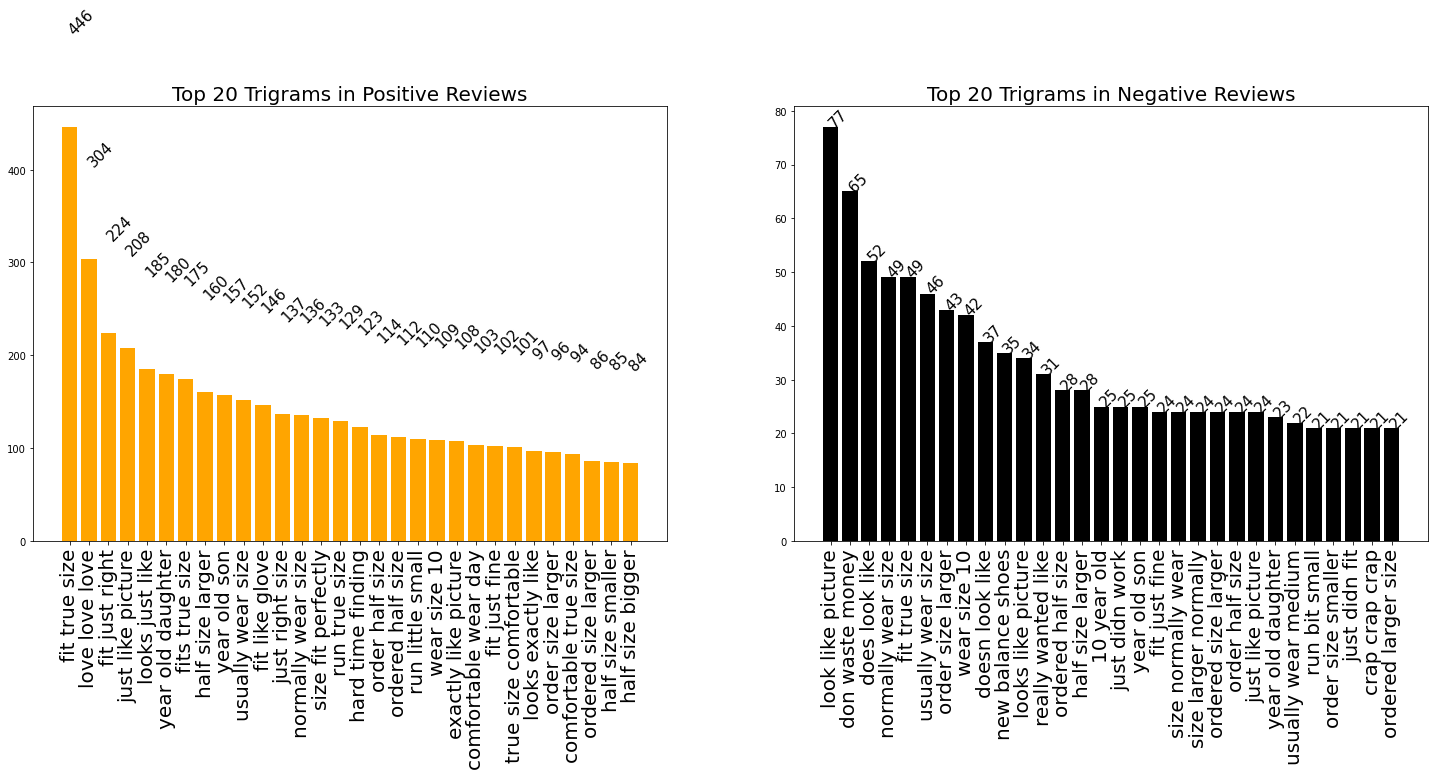

In [675]:
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good1=[x[0] for x in common_words_good1_em]
y_good1=[x[1] for x in common_words_good1_em]
plt.bar(x_good1,y_good1,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good1)):
    plt.text(i-0.2,y_good1[i]+100,'{}'.format(y_good1[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad1=[x[0] for x in common_words_bad1_em]
y_bad1=[x[1] for x in common_words_bad1_em]
plt.bar(x_bad1,y_bad1,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad1)):
    plt.text(i-0.2,y_bad1[i],'{}'.format(y_bad1[i]),size=15,rotation=45)

#### Non peak

In [659]:
common_words_good_sm = get_top_n_bigram(df_merged_c[(df_merged_c['pos_neg']==1) & (df_merged_c['month']>=1) & (df_merged_c['month']<=4) & (df_merged_c['year']>= 2006)& (df_merged_c['year']<= 2013)]['reviewText_comwords'], 30)
common_words_bad_sm = get_top_n_bigram(df_merged_c[(df_merged_c['pos_neg']==0) & (df_merged_c['month']>=1) & (df_merged_c['month']<=4)& (df_merged_c['year']>= 2006)& (df_merged_c['year']<= 2013)]['reviewText_comwords'], 30)


/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


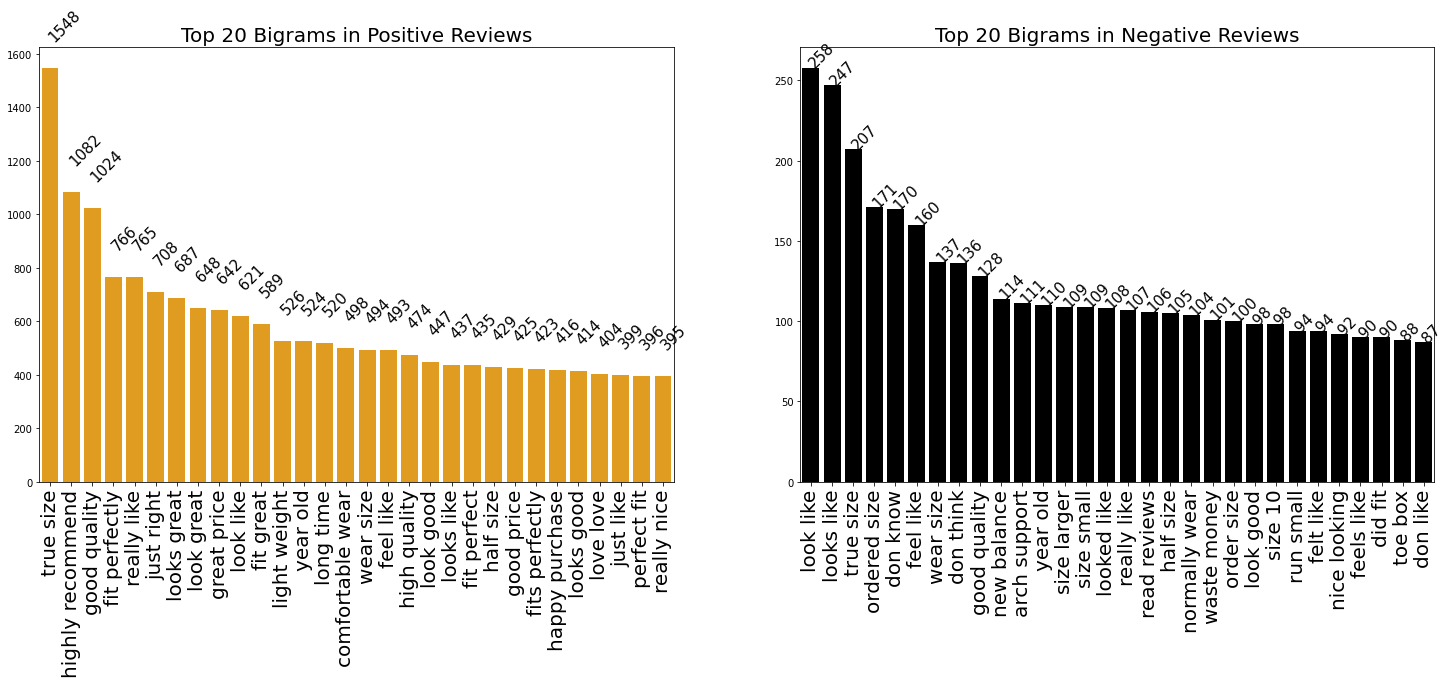

In [661]:
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good=[x[0] for x in common_words_good_sm]
y_good=[x[1] for x in common_words_good_sm]
sns.barplot(x_good,y_good,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good)):
    plt.text(i-0.2,y_good[i]+100,'{}'.format(y_good[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad=[x[0] for x in common_words_bad_sm]
y_bad=[x[1] for x in common_words_bad_sm]
sns.barplot(x_bad,y_bad,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad)):
    plt.text(i-0.2,y_bad[i],'{}'.format(y_bad[i]),size=15,rotation=45)

In [676]:
common_words_good1_sm = get_top_n_trigram(df_merged_c[(df_merged_c['pos_neg']==1)  & (df_merged_c['month']>=1) & (df_merged_c['month']<=4) & (df_merged_c['year']>= 2006)& (df_merged_c['year']<= 2013)]['reviewText_comwords'], 30)
common_words_bad1_sm= get_top_n_trigram(df_merged_c[(df_merged_c['pos_neg']==0)  & (df_merged_c['month']>=1) & (df_merged_c['month']<=4) & (df_merged_c['year']>= 2006)& (df_merged_c['year']<= 2013)]['reviewText_comwords'], 30)


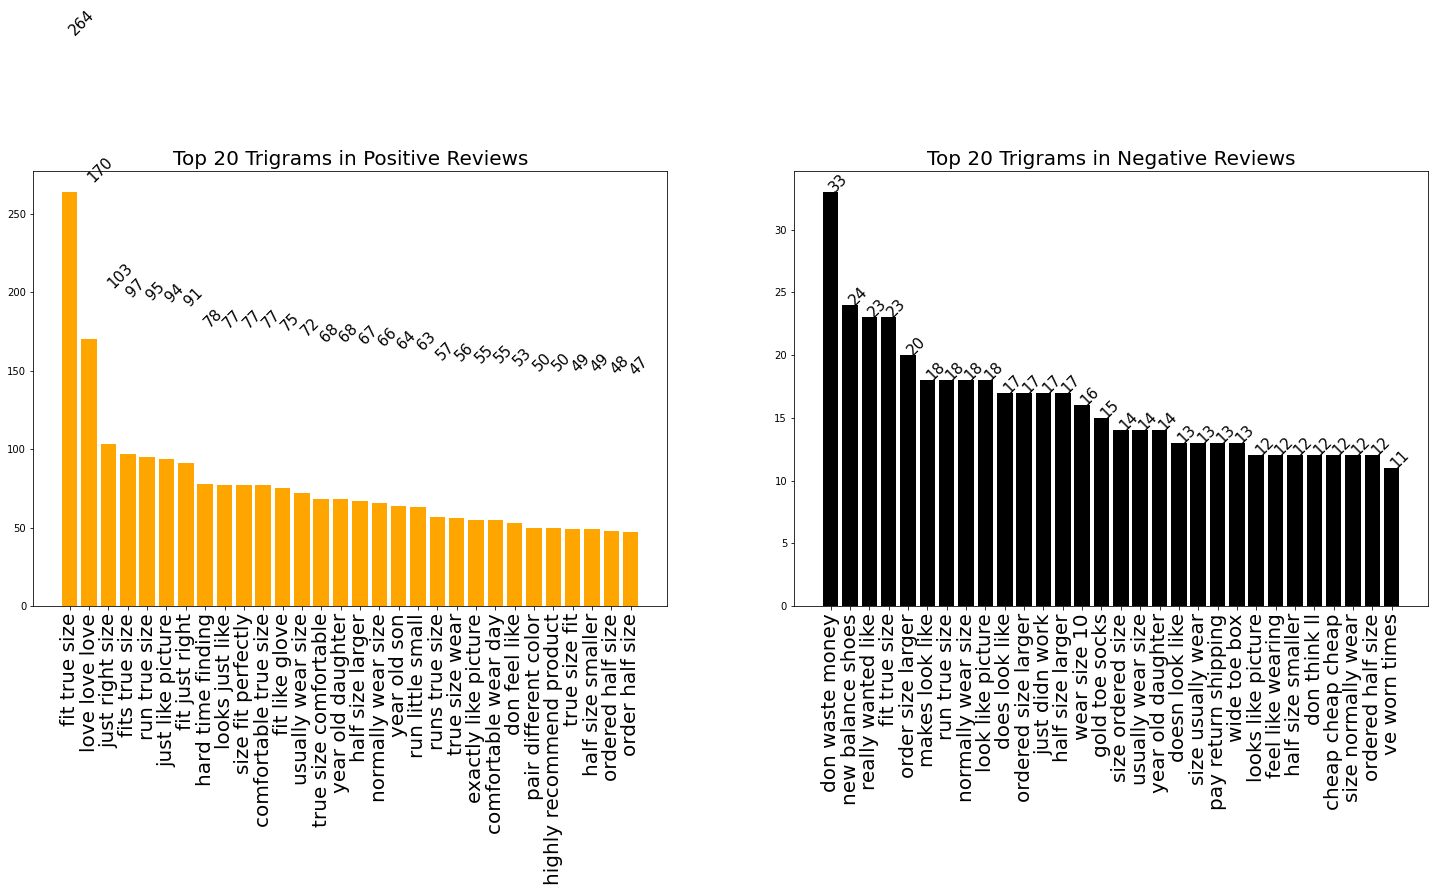

In [677]:
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good1=[x[0] for x in common_words_good1_sm]
y_good1=[x[1] for x in common_words_good1_sm]
plt.bar(x_good1,y_good1,color='orange')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good1)):
    plt.text(i-0.2,y_good1[i]+100,'{}'.format(y_good1[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad1=[x[0] for x in common_words_bad1_sm]
y_bad1=[x[1] for x in common_words_bad1_sm]
plt.bar(x_bad1,y_bad1,color='black')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Trigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad1)):
    plt.text(i-0.2,y_bad1[i],'{}'.format(y_bad1[i]),size=15,rotation=45)

####  Word Cloud across categories

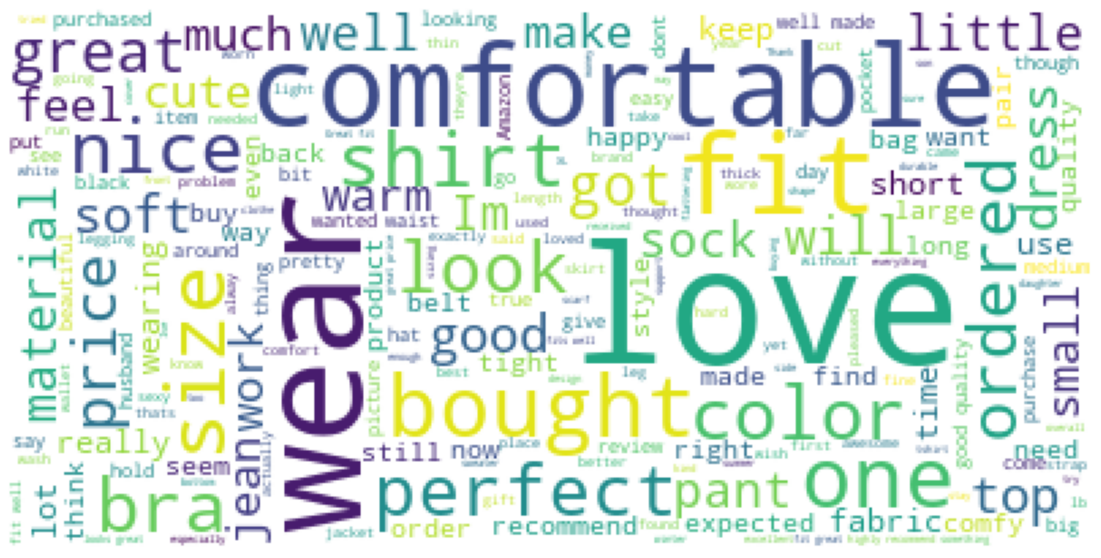

In [793]:
cloud_p_c = wordcloud.WordCloud(background_color='white', max_font_size=60, 
                                relative_scaling=1).generate(' '.join(df_merged_c[(df_merged_c['category_derived']=='Clothing') & (df_merged_c['pos_neg']==1)].total_review_nonum))
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud_p_c);


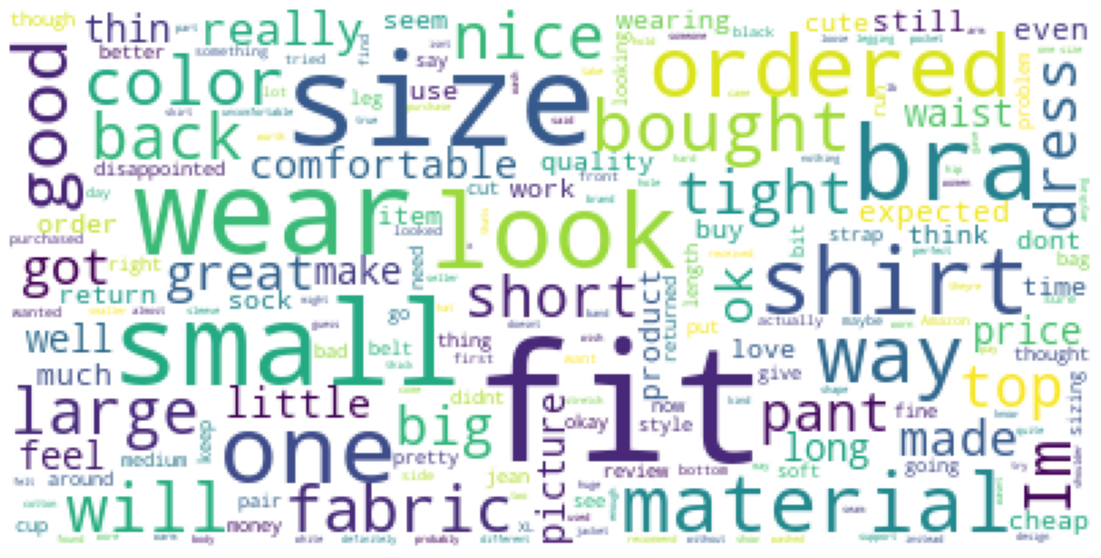

In [794]:
cloud_n_c = wordcloud.WordCloud(background_color='white', max_font_size=60, 
                                relative_scaling=1).generate(' '.join(df_merged_c[(df_merged_c['category_derived']=='Clothing') & (df_merged_c['pos_neg']==0)].total_review_nonum))
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud_n_c);


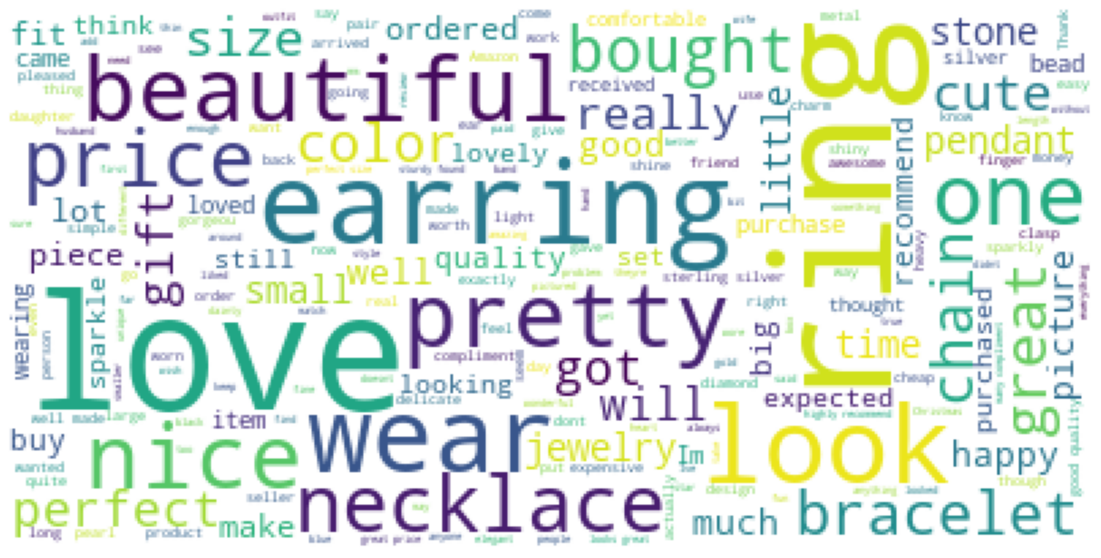

In [795]:
cloud_p_j = wordcloud.WordCloud(background_color='white', max_font_size=60, 
                                relative_scaling=1).generate(' '.join(df_merged_c[(df_merged_c['category_derived']=='Jewelry') & (df_merged_c['pos_neg']==1)].total_review_nonum))
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud_p_j);


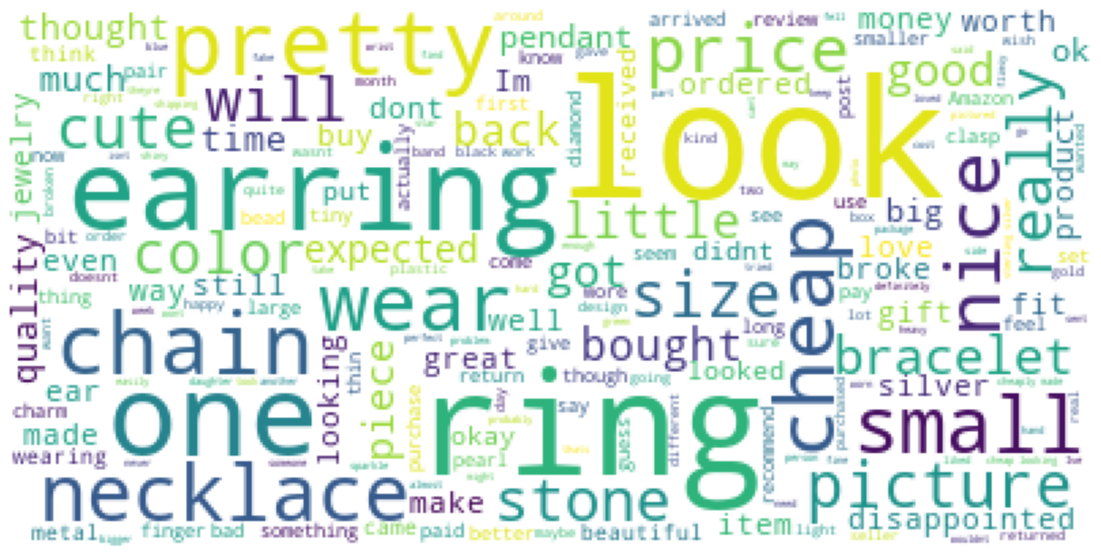

In [796]:
cloud_n_j = wordcloud.WordCloud(background_color='white', max_font_size=60, 
                                relative_scaling=1).generate(' '.join(df_merged_c[(df_merged_c['category_derived']=='Jewelry') & (df_merged_c['pos_neg']==0)].total_review_nonum))
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud_n_j);


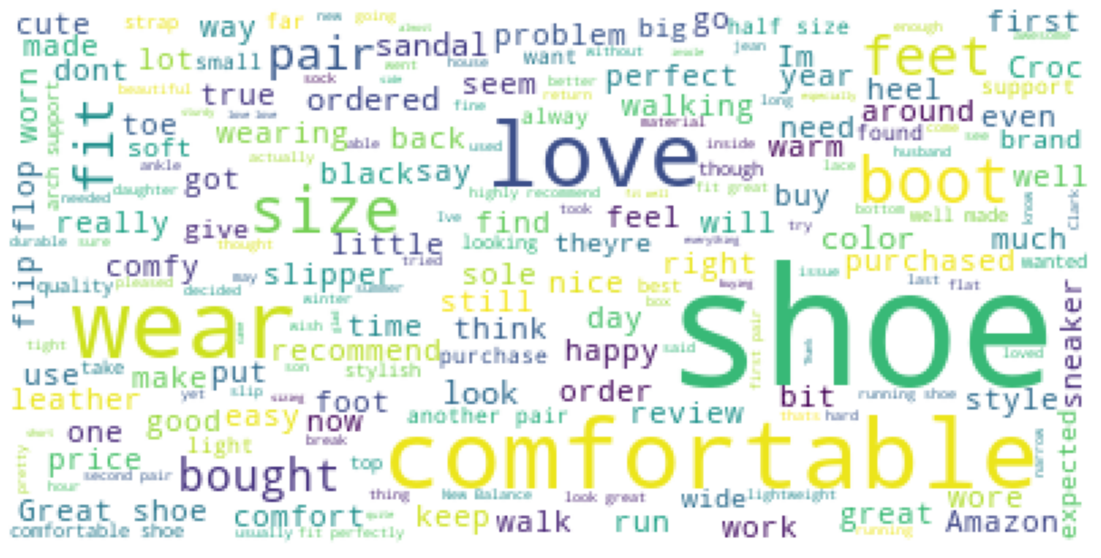

In [797]:
cloud_p_s = wordcloud.WordCloud(background_color='white', max_font_size=60, 
                                relative_scaling=1).generate(' '.join(df_merged_c[(df_merged_c['category_derived']=='Shoes') & (df_merged_c['pos_neg']==1)].total_review_nonum))
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud_p_s);


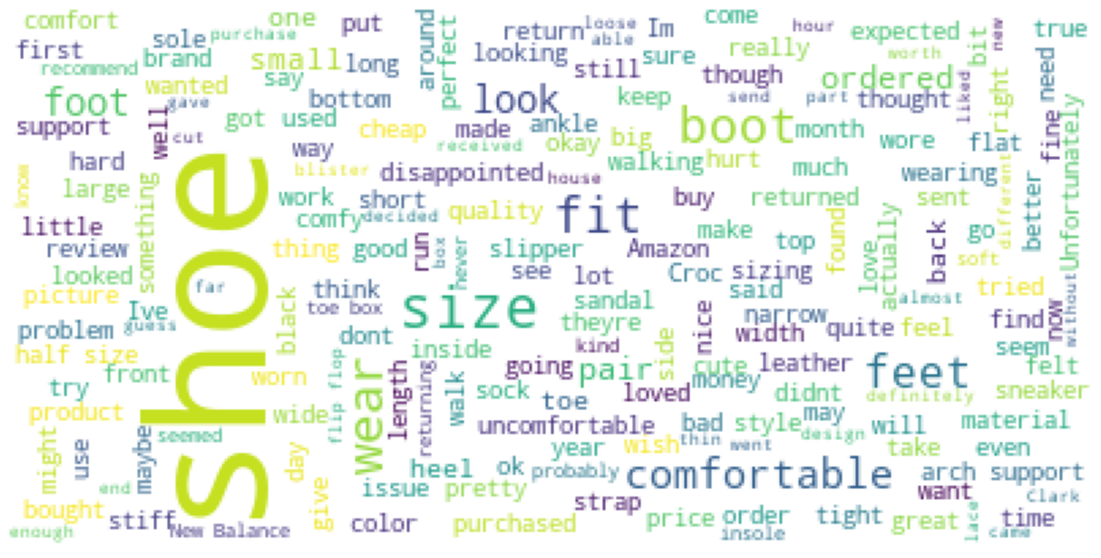

In [798]:
cloud_n_s = wordcloud.WordCloud(background_color='white', max_font_size=60, 
                                relative_scaling=1).generate(' '.join(df_merged_c[(df_merged_c['category_derived']=='Shoes') & (df_merged_c['pos_neg']==0)].total_review_nonum))
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud_n_s);


#### sales rank check 

In [723]:
df_check = df_merged_c[df_merged_c['salesrank_derived']!='']

In [724]:
df_check['salesrank_derived'] = df_check['salesrank_derived'].astype(int)

/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [748]:
df_check.groupby(['salesrank_derived','category_derived']).agg({'reviewText':'count'}).sort_values(by = 'reviewText',ascending=False)

reviewText
salesrank_derived category_derived            
214               Jewelry                  441
140               Clothing                 351
918               Clothing                 350
42                Clothing                 342
4                 Clothing                 328
...                                        ...
14466             Shoes                      5
95155             Jewelry                    5
1413              Jewelry                    5
44655             Clothing                   5
9455              Clothing                   4

[19922 rows x 1 columns]

In [735]:
df_check.groupby(['asin','salesrank_derived']).agg({'reviewText':'count'}).sort_values(by = 'reviewText',ascending=False).head(100)

reviewText
asin       salesrank_derived            
B005LERHD8 214                       441
B005GYGD7O 42                        286
B008WYDP1C 589                       249
B0058XIMMM 13                        241
B00CKGB85I 43                        225
B007RD9DS8 346                       217
B002RADHJC 19                        211
B0000C321X 5                         205
B007WNWEFC 314                       197
B0001ZNZJM 9                         197
B007WA3K4Y 1630                      191
B00012O12A 4                         189
B007NLX16O 848                       189
B0008EOEPK 8462                      186
B0007YR8WW 25                        185
B0067GUM2W 698                       183
B000O32MLI 5                         181
B001IB70JY 28453                     180
B004Q7AB4I 8                         175
B003NX87U6 228                       168
B006PGGJOE 80                        168
B002PHLVJA 11563                     162
B008KK0ZJ8 18                        161
B0083S18LQ 2490                      161
B005UVM368 3116                      158
B0007YVP1W 37                        158
B000KEG4V0 140                       153
B00DNQIIE8 607                       153
B004YM2FV2 4                         151
B008NCYALM 918                       148
B003XDVUEQ 46                        148
B0007CKMA4 67                        148
B008X0EW44 1871                      143
B00DMWQOYY 2020                      142
B0078FXHNM 586                       142
B000XDDERK 3                         141
B002KMI7OC 15                        140
B000J6ZYL0 12                        139
B001Q5QLP6 7                         138
B003DNR2HK 1550                      137
B0074T7TY0 773                       137
B00550PLV8 162                       137
B007WAU1VY 2366                      136
B0008172S4 781                       135
B00CIBCJ62 735                       134
B0068VM5T4 22939                     134
B000FBO0DM 4                         133
B000QW6LE6 23                        131
B0002TOZ1E 162                       127
B005CSNTJY 284                       127
B000DZUGOM 2                         126
B004R1II48 26                        126
B00CN47GXA 918                       123
B00D1MR8YU 83                        123
B001HEF6W0 114                       121
B0013KDS96 68                        119
B0000ANHST 11                        117
B007WAEBPQ 2337                      114
B0053XF2U2 140                       114
B0051U15E4 191                       114
B008RUOCJU 246768                    114
B00DQYNS3I 1                         114
B0009F0Z38 307                       114
B001AOZVSQ 166                       114
B0026P45QW 110                       113
B0007YXTOS 81                        112
B0006LMBJ6 8                         112
B00BNB3A0W 4180                      111
B000EIJG0I 100                       111
B000072UMJ 10                        111
B000FH4JJQ 41                        110
B0012QM8IS 24518                     109
B0076R6KY0 244                       109
B0081IZ3UA 33                        106
B0031U0PO2 116                       105
B001188FZC 616                       105
B00DMWQK0W 552                       104
B004M6XUI2 97                        103
B009DNWFD0 11837                     103
B002APTA9K 83                        102
B0007QCOTM 28                        102
B0051D7GF8 330                       102
B003DNR4XC 1278                      102
B009ZDEXQK 44                        102
B006SCSOOS 1022                      102
B0009B3IN6 23                        101
B003YBHF82 20                        100
B0012M0XSE 119                        99
B000MXIMHI 18                         99
B000KD44G8 211                        98
B007DLVLAW 5                          97
B000KGOHLM 752                        96
B0011D2FL2 68                         96
B000EX15NY 143                        95
B0018OM1TU 38                         94
B0019MPRJW 51                         94
B00AAJPBH8 1

In [739]:
set(df_check[df_check['salesrank_derived']==5]['asin'])

{'B0000C321X',
 'B0007QCQGI',
 'B000O32MLI',
 'B007DLVLAW',
 'B007DLVLC0',
 'B007DLVLDY',
 'B007DM6S72'}

In [742]:
set(df_check[df_check['asin']=='B0007QCQGI']['date'])

{'2006-03-09',
 '2008-12-06',
 '2009-01-08',
 '2009-08-19',
 '2010-01-21',
 '2010-10-09',
 '2010-11-18',
 '2011-07-09',
 '2011-12-06',
 '2012-07-07',
 '2012-07-19',
 '2012-07-28',
 '2012-07-30',
 '2012-08-12',
 '2012-08-19',
 '2012-09-28',
 '2012-11-09',
 '2012-11-20',
 '2012-12-12',
 '2012-12-17',
 '2012-12-28',
 '2013-01-21',
 '2013-01-22',
 '2013-03-30',
 '2013-04-05',
 '2013-04-10',
 '2013-04-22',
 '2013-05-09',
 '2013-05-26',
 '2013-06-20',
 '2013-07-10',
 '2013-07-17',
 '2013-07-28',
 '2013-08-20',
 '2013-08-21',
 '2013-08-25',
 '2013-08-30',
 '2013-09-06',
 '2013-09-10',
 '2013-09-17',
 '2013-10-05',
 '2013-10-14',
 '2013-10-18',
 '2013-10-22',
 '2013-10-28',
 '2013-10-30',
 '2013-11-06',
 '2013-11-08',
 '2013-11-16',
 '2013-11-18',
 '2013-12-16',
 '2013-12-30',
 '2014-01-04',
 '2014-01-07',
 '2014-01-10',
 '2014-01-25',
 '2014-01-27',
 '2014-02-09',
 '2014-02-18',
 '2014-02-21',
 '2014-02-26',
 '2014-02-27',
 '2014-03-04',
 '2014-03-07',
 '2014-03-12',
 '2014-03-20',
 '2014-03-

In [743]:
set(df_check[df_check['asin']=='B0000C321X']['date'])

{'2007-03-11',
 '2007-05-13',
 '2009-01-08',
 '2009-01-12',
 '2009-09-02',
 '2009-12-03',
 '2009-12-21',
 '2010-01-26',
 '2010-01-31',
 '2010-02-08',
 '2010-03-16',
 '2010-10-30',
 '2010-11-26',
 '2011-01-06',
 '2011-01-18',
 '2011-02-16',
 '2011-02-22',
 '2011-02-26',
 '2011-04-08',
 '2011-05-01',
 '2011-05-22',
 '2011-05-30',
 '2011-07-24',
 '2011-08-19',
 '2011-08-28',
 '2011-10-08',
 '2011-11-15',
 '2011-12-03',
 '2011-12-11',
 '2011-12-29',
 '2012-01-16',
 '2012-01-17',
 '2012-02-20',
 '2012-04-12',
 '2012-05-05',
 '2012-05-07',
 '2012-06-02',
 '2012-07-20',
 '2012-07-23',
 '2012-08-11',
 '2012-09-18',
 '2012-09-29',
 '2012-10-05',
 '2012-10-16',
 '2012-10-22',
 '2012-10-30',
 '2012-11-12',
 '2012-11-19',
 '2012-11-26',
 '2012-11-30',
 '2012-12-02',
 '2012-12-03',
 '2012-12-04',
 '2012-12-08',
 '2012-12-13',
 '2012-12-19',
 '2012-12-26',
 '2012-12-28',
 '2013-01-02',
 '2013-01-03',
 '2013-01-06',
 '2013-01-07',
 '2013-01-08',
 '2013-01-18',
 '2013-01-19',
 '2013-01-22',
 '2013-01-

In [744]:
set(df_check[df_check['asin']=='B000O32MLI']['date'])

{'2008-04-12',
 '2008-05-19',
 '2008-07-12',
 '2008-08-17',
 '2008-11-02',
 '2008-11-16',
 '2009-01-18',
 '2009-04-08',
 '2009-04-25',
 '2009-09-17',
 '2009-09-29',
 '2010-06-29',
 '2010-07-10',
 '2010-08-25',
 '2010-11-10',
 '2010-12-21',
 '2011-01-20',
 '2011-02-12',
 '2011-02-13',
 '2011-03-07',
 '2011-04-18',
 '2011-05-13',
 '2011-06-19',
 '2011-06-25',
 '2011-07-01',
 '2011-08-11',
 '2011-08-25',
 '2011-10-06',
 '2011-10-13',
 '2011-10-19',
 '2011-12-13',
 '2011-12-31',
 '2012-01-15',
 '2012-01-18',
 '2012-03-17',
 '2012-03-22',
 '2012-03-26',
 '2012-04-17',
 '2012-04-27',
 '2012-05-07',
 '2012-05-16',
 '2012-05-17',
 '2012-05-24',
 '2012-06-03',
 '2012-06-16',
 '2012-06-18',
 '2012-06-22',
 '2012-07-09',
 '2012-07-10',
 '2012-07-25',
 '2012-08-15',
 '2012-08-29',
 '2012-10-06',
 '2012-10-07',
 '2012-10-14',
 '2012-10-16',
 '2012-11-03',
 '2012-11-28',
 '2012-11-30',
 '2012-12-04',
 '2013-01-03',
 '2013-01-04',
 '2013-01-05',
 '2013-01-10',
 '2013-01-16',
 '2013-01-23',
 '2013-02-

In [749]:
set(df_check[df_check['category_derived']=='Jewelry']['salesrank_derived'])

{1,
 2,
 3,
 65542,
 7,
 8,
 49161,
 65546,
 11,
 9,
 65549,
 13,
 15,
 57359,
 16,
 24594,
 17,
 32785,
 21,
 14,
 23,
 40977,
 18,
 24602,
 26,
 28,
 20,
 30,
 65567,
 33,
 34,
 35,
 36,
 65575,
 39,
 41,
 24618,
 41004,
 45,
 46,
 47,
 49,
 51,
 52,
 32821,
 53,
 10,
 58,
 60,
 61,
 62,
 49216,
 8256,
 319554,
 49219,
 66,
 68,
 71,
 72,
 73,
 75,
 76,
 77,
 57422,
 80,
 81,
 82,
 24657,
 84,
 65621,
 24662,
 85,
 88,
 49240,
 90,
 24668,
 24672,
 99,
 100,
 104,
 105,
 49258,
 16488,
 110,
 65649,
 114,
 116,
 117,
 118,
 57462,
 119,
 32889,
 121,
 24697,
 124,
 127,
 128,
 130,
 24708,
 133,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 8338,
 146,
 24725,
 149,
 8342,
 150,
 152,
 155,
 156,
 49309,
 157,
 159,
 160,
 73889,
 162,
 165,
 166,
 167,
 168,
 171,
 175,
 24752,
 177,
 123059,
 114868,
 32952,
 24760,
 186,
 184,
 65724,
 8381,
 189,
 191,
 193,
 194,
 195,
 197,
 8390,
 201,
 57546,
 203,
 65741,
 207,
 8400,
 211,
 213,
 214,
 215,
 218,
 49374,
 222,
 224

In [750]:
set(df_check[df_check['category_derived']=='Clothing']['salesrank_derived'])

{32769,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 21,
 22,
 98327,
 24,
 25,
 23,
 27,
 26,
 32795,
 30,
 31,
 32800,
 32,
 34,
 37,
 38,
 39,
 40,
 42,
 43,
 44,
 131116,
 32815,
 48,
 50,
 32819,
 32820,
 53,
 55,
 32824,
 163897,
 57,
 58,
 60,
 61,
 62,
 196673,
 65,
 67,
 32836,
 68,
 229443,
 66,
 72,
 294980,
 70,
 75,
 32845,
 393295,
 80,
 81,
 82,
 83,
 84,
 32855,
 196696,
 87,
 32857,
 90,
 96,
 97,
 98,
 99,
 103,
 65640,
 262250,
 107,
 32875,
 109,
 110,
 113,
 32881,
 115,
 116,
 32883,
 32886,
 119,
 120,
 124,
 125,
 126,
 130,
 131,
 132,
 65670,
 134,
 196744,
 32905,
 138,
 139,
 140,
 137,
 142,
 143,
 144,
 65676,
 146,
 147,
 98449,
 149,
 141,
 151,
 152,
 153,
 154,
 155,
 196759,
 32921,
 161,
 162,
 163,
 166,
 196776,
 170,
 172,
 173,
 32942,
 175,
 196784,
 229554,
 178,
 180,
 181,
 32950,
 183,
 184,
 185,
 229558,
 182,
 191,
 192,
 196801,
 194,
 195,
 197,
 200,
 202,
 203,
 98510,
 208,
 209,
 211,
 212,
 213,
 215,
 218,
 21

In [753]:
set(df_check[df_check['category_derived']=='Shoes']['salesrank_derived'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 32778,
 12,
 13,
 11,
 15,
 17,
 18,
 19,
 20,
 98323,
 21,
 23,
 24,
 65554,
 65562,
 27,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 65576,
 32806,
 44,
 46,
 50,
 51,
 52,
 131124,
 54,
 56,
 57,
 32824,
 59,
 60,
 61,
 62,
 64,
 66,
 67,
 68,
 71,
 65608,
 72,
 74,
 75,
 76,
 32844,
 78,
 83,
 84,
 32853,
 87,
 88,
 89,
 91,
 93,
 94,
 96,
 98,
 99,
 100,
 102,
 104,
 105,
 107,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 65650,
 65654,
 65646,
 122,
 123,
 126,
 32894,
 128,
 129,
 132,
 133,
 65668,
 135,
 136,
 138,
 65676,
 141,
 32910,
 143,
 144,
 142,
 140,
 65684,
 148,
 152,
 153,
 131226,
 155,
 156,
 157,
 161,
 162,
 165,
 169,
 170,
 171,
 173,
 174,
 175,
 98479,
 177,
 178,
 179,
 181,
 184,
 32953,
 185,
 186,
 188,
 189,
 193,
 194,
 196,
 197,
 203,
 205,
 206,
 207,
 210,
 211,
 32979,
 214,
 32982,
 216,
 217,
 218,
 219,
 221,
 222,
 223,
 224,
 226,
 227,
 228,
 229,
 233,
 65769,
 235,
 236,
 237,
 238,
 3

In [759]:
df_check[(df_check['category_derived']=='Shoes') & (df_check['salesrank_derived']==7)]

Unnamed: 0      reviewerID        asin                         reviewerName   helpful                                         reviewText  overall                                            summary  unixReviewTime   reviewTime  metadataid     salesrank                                              imurl                                         categories                        title description  price                                            related brand  positive_helpful  negative_helpful  total_helpful  positive_helpful_ratio  len_reviewText category_derived  len_summary check len_summary_bins len_reviewText_bins                                 reviewText_cleaned                                    summary_cleaned  len_reviewText_cleaned  len_summary_cleaned len_summary_cleaned_bins len_reviewText_claned_bins price_bins  salesrank_derived        date  month             asin_reviewer  pos_neg                                       review_nonum  year  \
70999        70999    AIVMZ6F8UXRM  B001Q5QLP6                          2Kids "Mom"    [0, 0]  These are really comfortable and true to size....      5.0                                         great shoe      1369267200  05 23, 2013     3913551  {'Shoes': 7}  http://ecx.images-amazon.com/images/I/41bwhM5w...  [['Clothing, Shoes & Jewelry', 'Shoes & Access...  KEEN Women's Whisper Sandal         NaN    NaN  {'also_bought': ['B0035FE60M', 'B0001MQ60A', '...   NaN                 0                 0              0                0.000000           241.0            Shoes         10.0     L                L                   M  ThesearereallycomfortableandtruetosizeIweara95...                                          greatshoe                     184                    9                        L                          M        NaN                  7  2013-05-23      5    B001Q5QLP6AIVMZ6F8UXRM        1  These are really comfortable and true to size ...  2013   
71000        71000  A3MGZY6VJSTHOU  B001Q5QLP6                 A. Haynes "andigirl"    [0, 0]  Love these sandals, but my insert kept slippin...      2.0                       Can't wear with ortho insert      1401840000   06 4, 2014     3913551  {'Shoes': 7}  http://ecx.images-amazon.com/images/I/41bwhM5w...  [['Clothing, Shoes & Jewelry', 'Shoes & Access...  KEEN Women's Whisper Sandal         NaN    NaN  {'also_bought': ['B0035FE60M', 'B0001MQ60A', '...   NaN                 0                 0              0                0.000000           125.0            Shoes         28.0     H                H                   L  Lovethesesandalsbutmyinsertkeptslippingouttheb...                            Cantwearwithorthoinsert                      94                   23                        H                          L        NaN                  7  2014-06-04      6  B001Q5QLP6A3MGZY6VJSTHOU        0  Love these sandals but my insert kept slipping...  2014   
71001        71001  A2YOTQ01MW4JML  B001Q5QLP6                                 Alma    [3, 4]  I have very long, slender, narrow feet and I h...      5.0                   Wish I could afford every color!      1339977600  06 18, 2012     3913551  {'Shoes': 7}  http://ecx.images-amazon.com/images/I/41bwhM5w...  [['Clothing, Shoes & Jewelry', 'Shoes & Access...  KEEN Women's Whisper Sandal         NaN    NaN  {'also_bought': ['B0035FE60M', 'B0001MQ60A', '...   NaN                 3                 4              7                0.428571          1046.0            Shoes         32.0     H                H                   H  IhaveverylongslendernarrowfeetandIhavebecomefr...                         WishIcouldaffordeverycolor                     810                   26                        H                          H        NaN                  7  2012-06-18      6  B001Q5QLP6A2YOTQ01MW4JML        1  I have very long slender narrow feet and I hav...  2012   
71002        71002  A241HBUTNOTAPB  B001Q5QLP6                               Amanda    [1, 1]  These are unbelie